# **Project Name**    - **Global Terrorism Dataset**



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **GitHub Link**    

https://github.com/prashant982/EDA-GlobalTerrorism/tree/main

# **Project Summary**

This project analyses and visualises an overview of the Global Terrorism.

This project uses Numpy, Pandas, Matplotlib to acheive the same.

# **Problem Statement**


**To analyse terrorist activities around the world which includes the number of people killed, the most affected countries, terrorist group responsible for most number of killings, etc.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [38]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')
file = '/content/gdrive/MyDrive/Colab Notebooks/Module/Project/EDA/Global Terrorism Dataset/Global Terrorism Data.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [40]:
#Since there was an encoding error, used the following code to resolve it.
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [41]:
terror_data = pd.read_csv(file, encoding='ISO-8859-1')

<ipython-input-41-3acf5c4dcdd8>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror_data = pd.read_csv(file, encoding='ISO-8859-1')


### Dataset First View

In [42]:
# Dataset First Look
terror_data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [43]:
# Dataset Rows & Columns count
terror_data.shape

(181691, 135)

### Dataset Information

In [44]:
# Dataset Info
terror_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

#### Duplicate Values

In [45]:
# Dataset Duplicate Value Count
terror_data.drop_duplicates(keep='first',inplace=True)
terror_data.shape


(181691, 135)

Indicates that there are no duplicates in the dataset

#### Missing Values/Null Values

In [46]:
# Missing Values/Null Values Count
terror_data.isnull().sum().sort_values(ascending = False).head(60)

gsubname3             181671
weapsubtype4_txt      181621
weapsubtype4          181621
weaptype4             181618
weaptype4_txt         181618
claimmode3            181558
claimmode3_txt        181558
gsubname2             181531
claim3                181373
guncertain3           181371
gname3                181367
divert                181367
attacktype3           181263
attacktype3_txt       181263
ransomnote            181177
ransompaidus          181139
ransomamtus           181128
claimmode2            181075
claimmode2_txt        181075
ransompaid            180917
corp3                 180665
targsubtype3          180594
targsubtype3_txt      180594
natlty3_txt           180544
natlty3               180544
target3               180516
targtype3             180515
targtype3_txt         180515
ransomamt             180341
weapsubtype3_txt      179998
weapsubtype3          179998
weaptype3_txt         179828
weaptype3             179828
claim2                179801
guncertain2   

<Axes: >

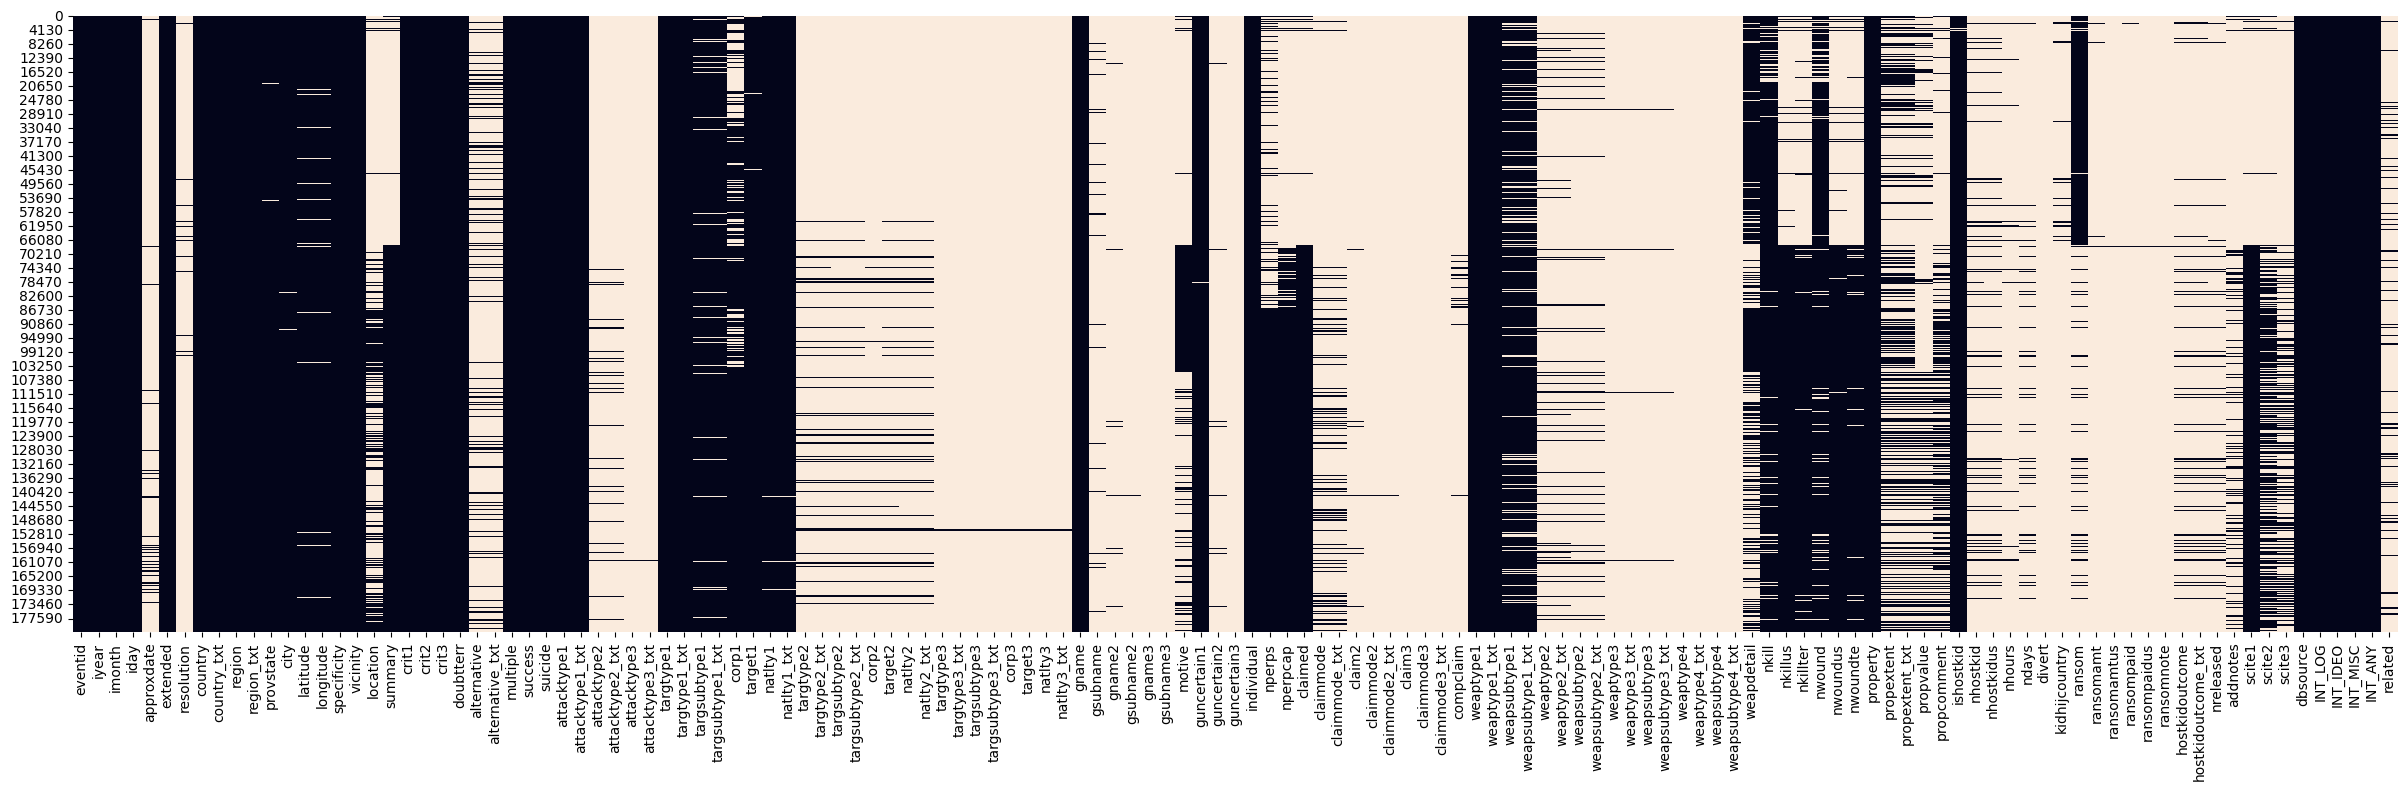

In [47]:
# Visualizing the missing values
plt.figure(figsize=(30,8))
sns.heatmap(terror_data.isnull(), cbar=False)

<Axes: >

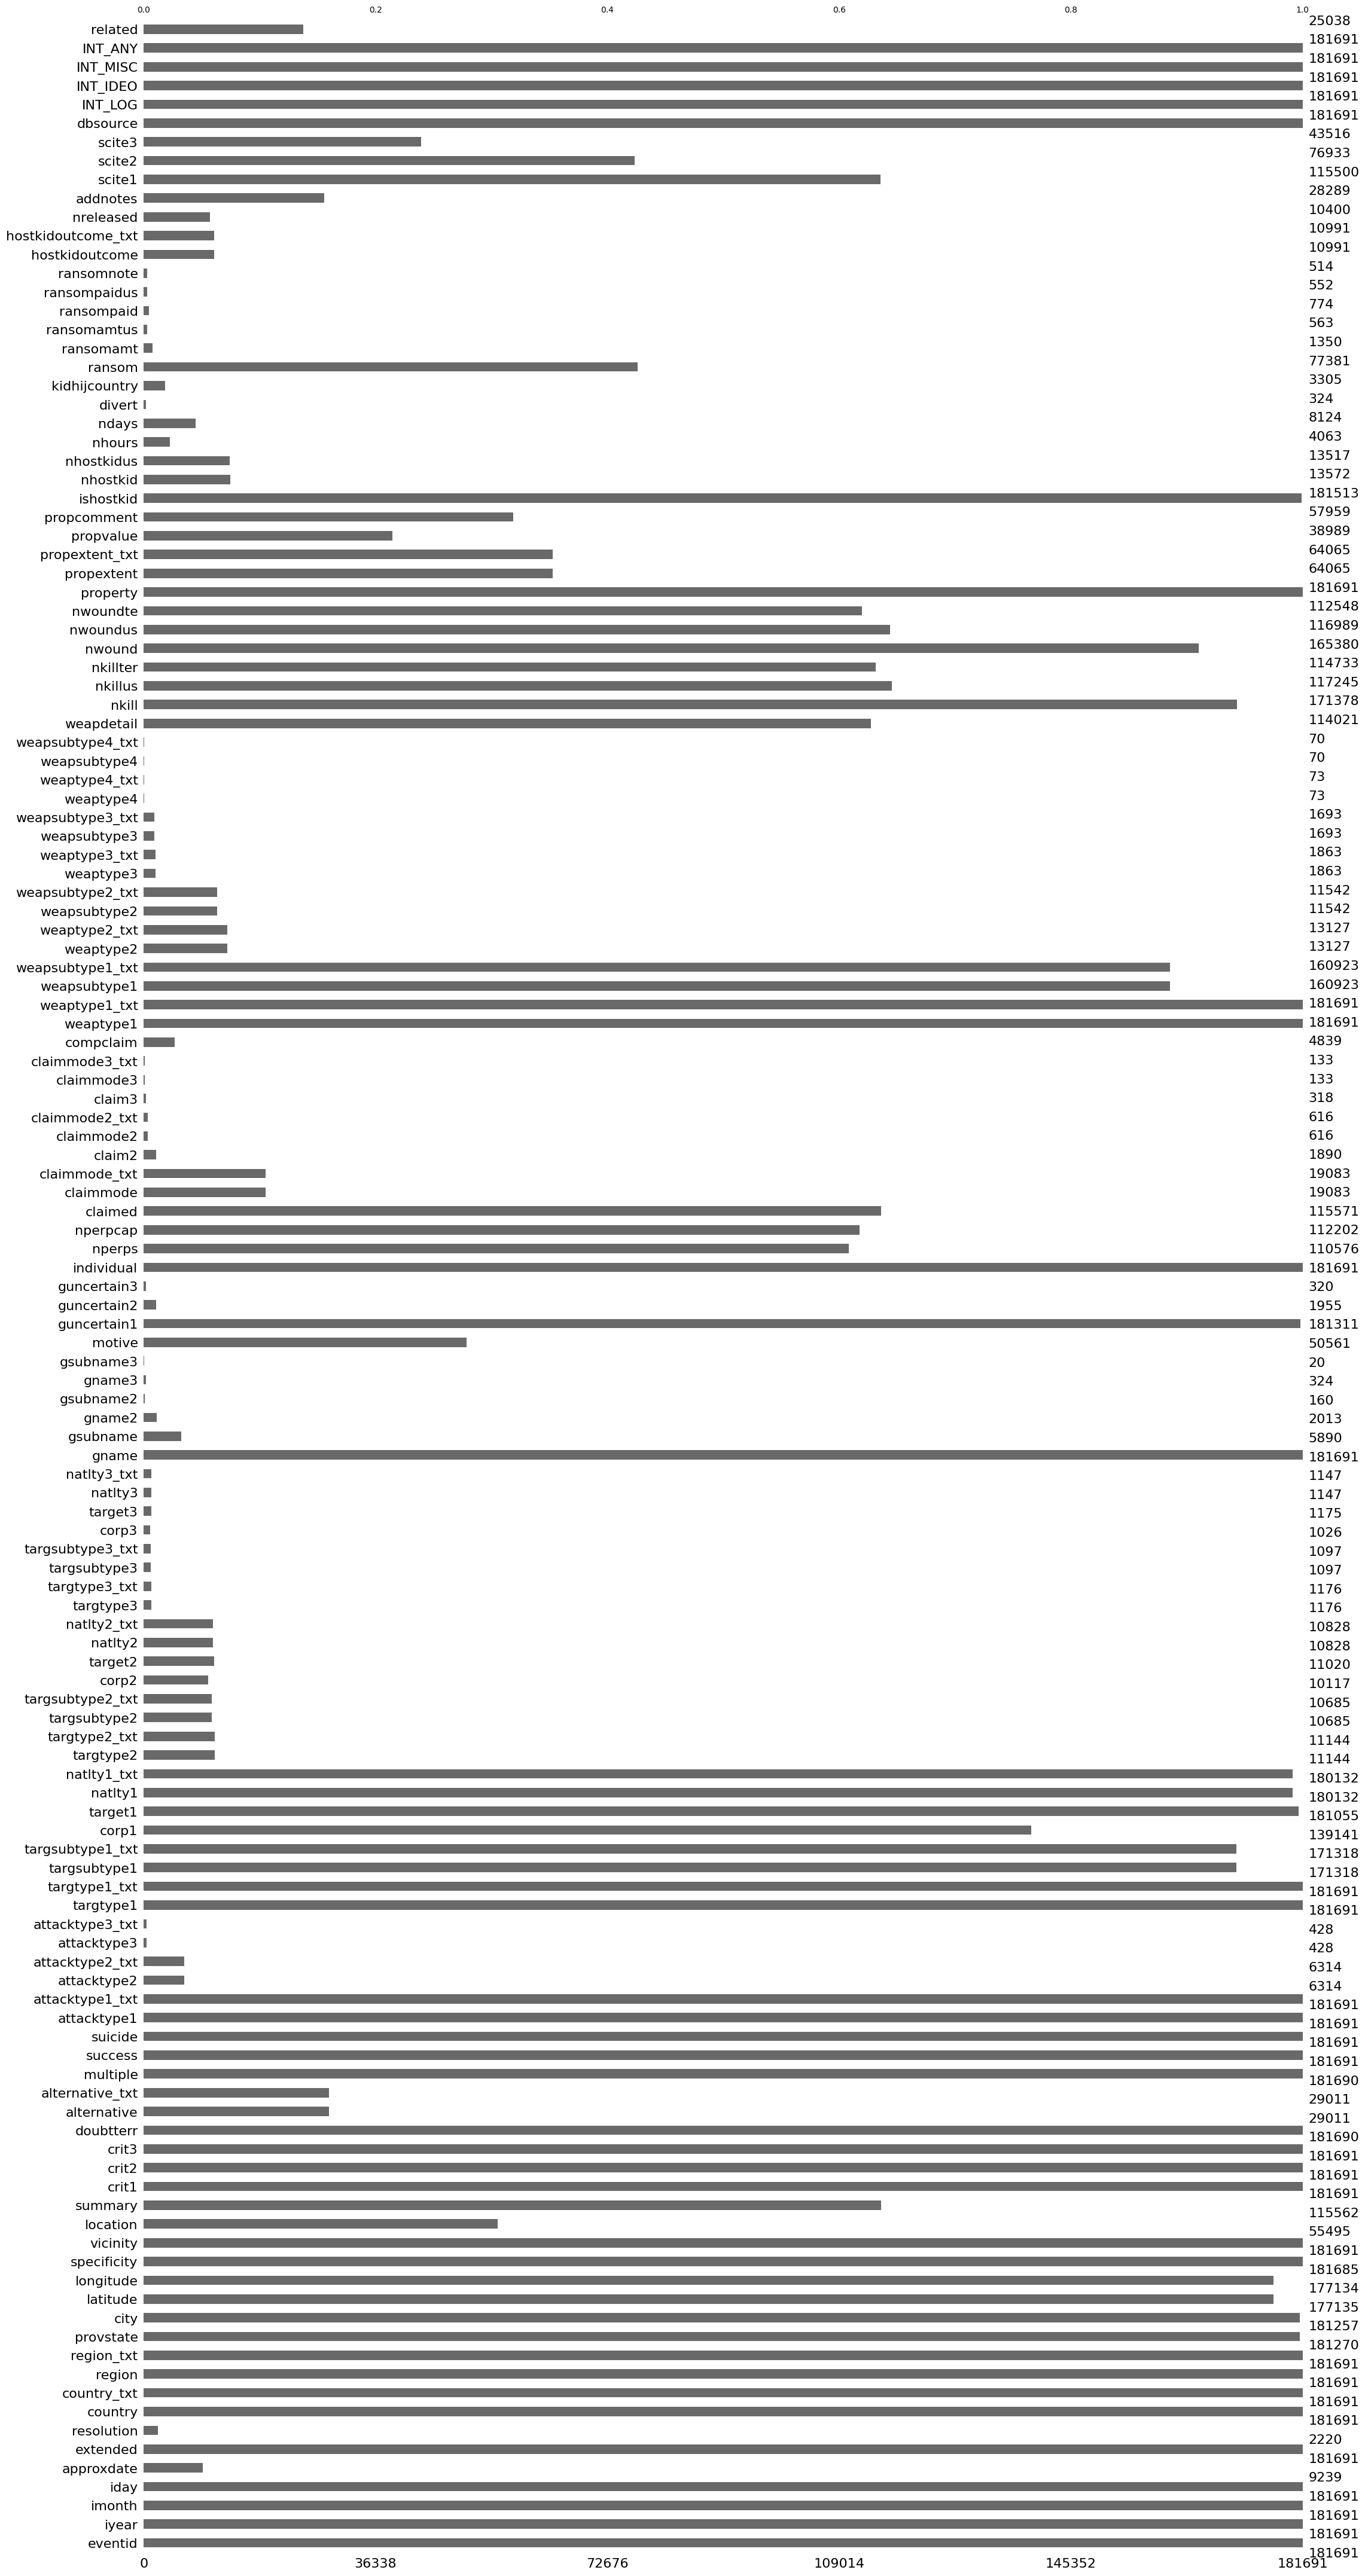

In [48]:
#Visualising the missing values in a bar chart
import missingno as msno
msno.bar(terror_data)

### What did you know about your dataset?

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. It  includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.

## ***2. Understanding Your Variables***

In [49]:
# Dataset Columns
my_list = list(terror_data)
print(my_list)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [50]:
# Dataset Describe
terror_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


### Variables Description

Here are some important variables:

* **eventid** - 12 Digit. First 8 numbers are date recorde. Last 4 numbers are sequential.
* **iyear** - Year in which the attack took place.
* **imonth** - Number of the month in which the attack took place.
* **iday** - Numeric day of the month on which the attack took place.
* **extended** - 1 = Yes. The duration of an incident extended more than 24 hours. 0 = No.
* **country** - Identifies the country code.
* **country_txt** - Identifies the country where the attack happened.
* **provstate** - Name of the subnational administrative region.
* **city** - Name of the city, village or town in which the incident happened.
* **success** - The success of a terrorist attack. 1 = Success. 0 = Not a success.
* **suicide** - 1 = Yes. The incident was a suicide attack. 0 = No indication of a suicide attack.
* **attacktype1** - The general method of attack.
* **attacktype1_txt** - It descibes the above variable. Example:
  * 1 - Assassination
  * 2 - Armed Assault
  * 3 - Bombing/Explosion
  * 4 - Hijacking
  * 5 - Hostage Taking (Barricade Incident)
  * 6 - Hostage Taking (Kidnapping)
  * 7 - Facility/Infrastructure Attack
  * 8 - Unarmed Assault
  * 9 - Unknown
* **targtype1** - The general type of taget/victim.
* **targtype1_txt** - It descibes the above variable. Example:
  * 1 - Business
  * 6 - Airports & Aircraft
  * 12 - NGO
  * 17 - Terrorists/Non-State Militia
  * 20 - Unknown
  * 22 - Violent Political Party
* **targsubtype1** - Specific target of the attack.
* **targsubtype1_txt** - It descibes the above variable. Example:
  * 22 - Police Building (headquarters, station, school)
  * 12 - Construction
  * 44 - Airport
  * 86 - Place of Worship
  * 49 - School/University/Educational Building
* **natlty1_txt** - The nationality of the target that was attacked.
* **weaptype1_txt** - General type of weapon used in the incident.
* **nkill** - The number of total confirmed fatalities for the incident.
* **nkillus** - The number of U.S. citizens who died as a result of the incident.
* **nwound** - The number of wounded in incident.
* **hostkidoutcome_txt** - The outcome of a hostage kidnapping case.




*Check Unique Values for some of the important variable.*

In [51]:
# Unique value of country_txt
terror_data.country_txt.unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [52]:
# Unique value of attack type
terror_data.attacktype1_txt.unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [53]:
# Unique value of target type
terror_data.targtype1_txt.unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [54]:
# Unique value of nationality
terror_data.natlty1_txt.unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Jordan', 'Ethiopia', 'Spain', nan,
       'Japan', 'International', 'Egypt', 'Paraguay', 'Soviet Union',
       'Ireland', 'Argentina', 'Philippines', 'China',
       'West Bank and Gaza Strip', 'Multinational', 'Northern Ireland',
       'Brazil', 'Haiti', 'South Africa', 'Portugal', 'Colombia',
       'Greece', 'Nicaragua', 'Indonesia', 'Yugoslavia', 'Italy',
       'Rhodesia', 'Ivory Coast', 'Iran', 'Canada', 'Poland', 'Sweden',
       'Turkey', 'Costa Rica', 'Russia', 'Iraq', 'Cuba', 'France',
       'Malawi', 'Democratic Republic of the Congo', 'Netherlands',
       'Chile', 'Hong Kong', 'Yemen', 'Mexico', 'Syria', 'India',
       'New Zealand', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'Bolivia', 'El Salvador', 'Botswana', 'Guate

In [55]:
# Unique value of weapon type
terror_data.weaptype1_txt.unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [56]:
#Data Renaming for easy comprehension
terror_data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'provstate':'State','attacktype1_txt':'AttackType','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubType',
                            'natlty1_txt':'Nationality', 'weaptype1_txt':'WeaponType', 'nkill':'Killed', 'nkillus':'US_CitizensKilled', 'nwound':'Wounded',
                            'hostkidoutcome_txt':'HostageOutcome','region_txt':'Region','gname':'GroupName','claimed':'Claimed','city':'City'}, inplace=True)

In [57]:
terror_data.head(5)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [58]:
#Removing the columns that are not necessary for our Exploratory Data Analysis
new_terror_data = terror_data[['Year','Month','Day','Country','Region','State','City','AttackType','TargetType','TargetSubType',
                               'Nationality','WeaponType','Killed','US_CitizensKilled','Wounded','HostageOutcome','GroupName','Claimed']]

In [59]:
print(new_terror_data.columns)

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'AttackType', 'TargetType', 'TargetSubType', 'Nationality',
       'WeaponType', 'Killed', 'US_CitizensKilled', 'Wounded',
       'HostageOutcome', 'GroupName', 'Claimed'],
      dtype='object')


In [60]:
new_terror_data.head()

,Year,Month,Day,Country,Region,State,City,AttackType,TargetType,TargetSubType,Nationality,WeaponType,Killed,US_CitizensKilled,Wounded,HostageOutcome,GroupName,Claimed
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,Unknown,1.0,NaN,0.0,NaN,MANO-D,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,Unknown,0.0,NaN,0.0,NaN,23rd of September Communist League,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,1.0,NaN,0.0,NaN,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Explosives,NaN,NaN,NaN,NaN,Unknown,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Incendiary,NaN,NaN,NaN,NaN,Unknown,NaN


In [61]:
new_terror_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               181691 non-null  int64  
 1   Month              181691 non-null  int64  
 2   Day                181691 non-null  int64  
 3   Country            181691 non-null  object 
 4   Region             181691 non-null  object 
 5   State              181270 non-null  object 
 6   City               181257 non-null  object 
 7   AttackType         181691 non-null  object 
 8   TargetType         181691 non-null  object 
 9   TargetSubType      171318 non-null  object 
 10  Nationality        180132 non-null  object 
 11  WeaponType         181691 non-null  object 
 12  Killed             171378 non-null  float64
 13  US_CitizensKilled  117245 non-null  float64
 14  Wounded            165380 non-null  float64
 15  HostageOutcome     10991 non-null   object 
 16  Gr

In [62]:
print(new_terror_data.isnull().sum())

Year                      0
Month                     0
Day                       0
Country                   0
Region                    0
State                   421
City                    434
AttackType                0
TargetType                0
TargetSubType         10373
Nationality            1559
WeaponType                0
Killed                10313
US_CitizensKilled     64446
Wounded               16311
HostageOutcome       170700
GroupName                 0
Claimed               66120
dtype: int64


We can see that the column **HostageOutcome** has most null values so it is wise to drop the column.

In [63]:
new_terror_data = new_terror_data.drop(['HostageOutcome'],axis=1)

In [64]:
print(new_terror_data.isnull().sum())

Year                     0
Month                    0
Day                      0
Country                  0
Region                   0
State                  421
City                   434
AttackType               0
TargetType               0
TargetSubType        10373
Nationality           1559
WeaponType               0
Killed               10313
US_CitizensKilled    64446
Wounded              16311
GroupName                0
Claimed              66120
dtype: int64


Now, for the three columns - **Killed**, **US_CitizensKilled** and **Wounded**, there are multiple rows with null values. Instead of keeping it null, we will assign the value **0**.

In [65]:
new_terror_data['Killed'] = new_terror_data['Killed'].fillna(0)
new_terror_data['US_CitizensKilled'] = new_terror_data['US_CitizensKilled'].fillna(0)
new_terror_data['Wounded'] = new_terror_data['Wounded'].fillna(0)
new_terror_data['City'].fillna('Unknown',inplace=True)          ## Filling NaN categorical values with 'Unknown'


Now, for the three columns, **State**, **TargetSubType**, **Nationality** there are multiple rows with null values. Instead of keeping it null, we will assign the value **Unknown**.

---



In [66]:
values = {'State':'Unknown', 'TargetSubType':'Unknown', 'Nationality':'Unknown'}
new_terror_data = new_terror_data.fillna(value=values)

In [67]:
print(new_terror_data.isnull().sum())

Year                     0
Month                    0
Day                      0
Country                  0
Region                   0
State                    0
City                     0
AttackType               0
TargetType               0
TargetSubType            0
Nationality              0
WeaponType               0
Killed                   0
US_CitizensKilled        0
Wounded                  0
GroupName                0
Claimed              66120
dtype: int64


Now, we see that the column **Claimed** still has Null values in it. We will be leaving it as it is.

### What all manipulations have you done and insights you found?

1. Out of 135 variables from the original data, only 16 columns will be used for Data Analysis.
2. The name of the columns have been renamed for better understanding.
3. Dropped one of the columns named - **HostageOutcome** because it had too many null values(almost **93%** were null).  
4. The values in columns named - **Killed**, **US_CitizensKilled** and **Wounded** which were filled with Null, have been filled with 0.
5. The values in columns named - **State**, **TargetSubType**, **Nationality** which were filled with Null, have been filled with **Unknown**.
6. Created a new column named **TotalFatalities** which is obatained by adding the columns - **Killed** and **Wounded**.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Terrorist Activities Each Year

Text(0.5, 1.0, 'Number of Terrorist Activities Each Year')

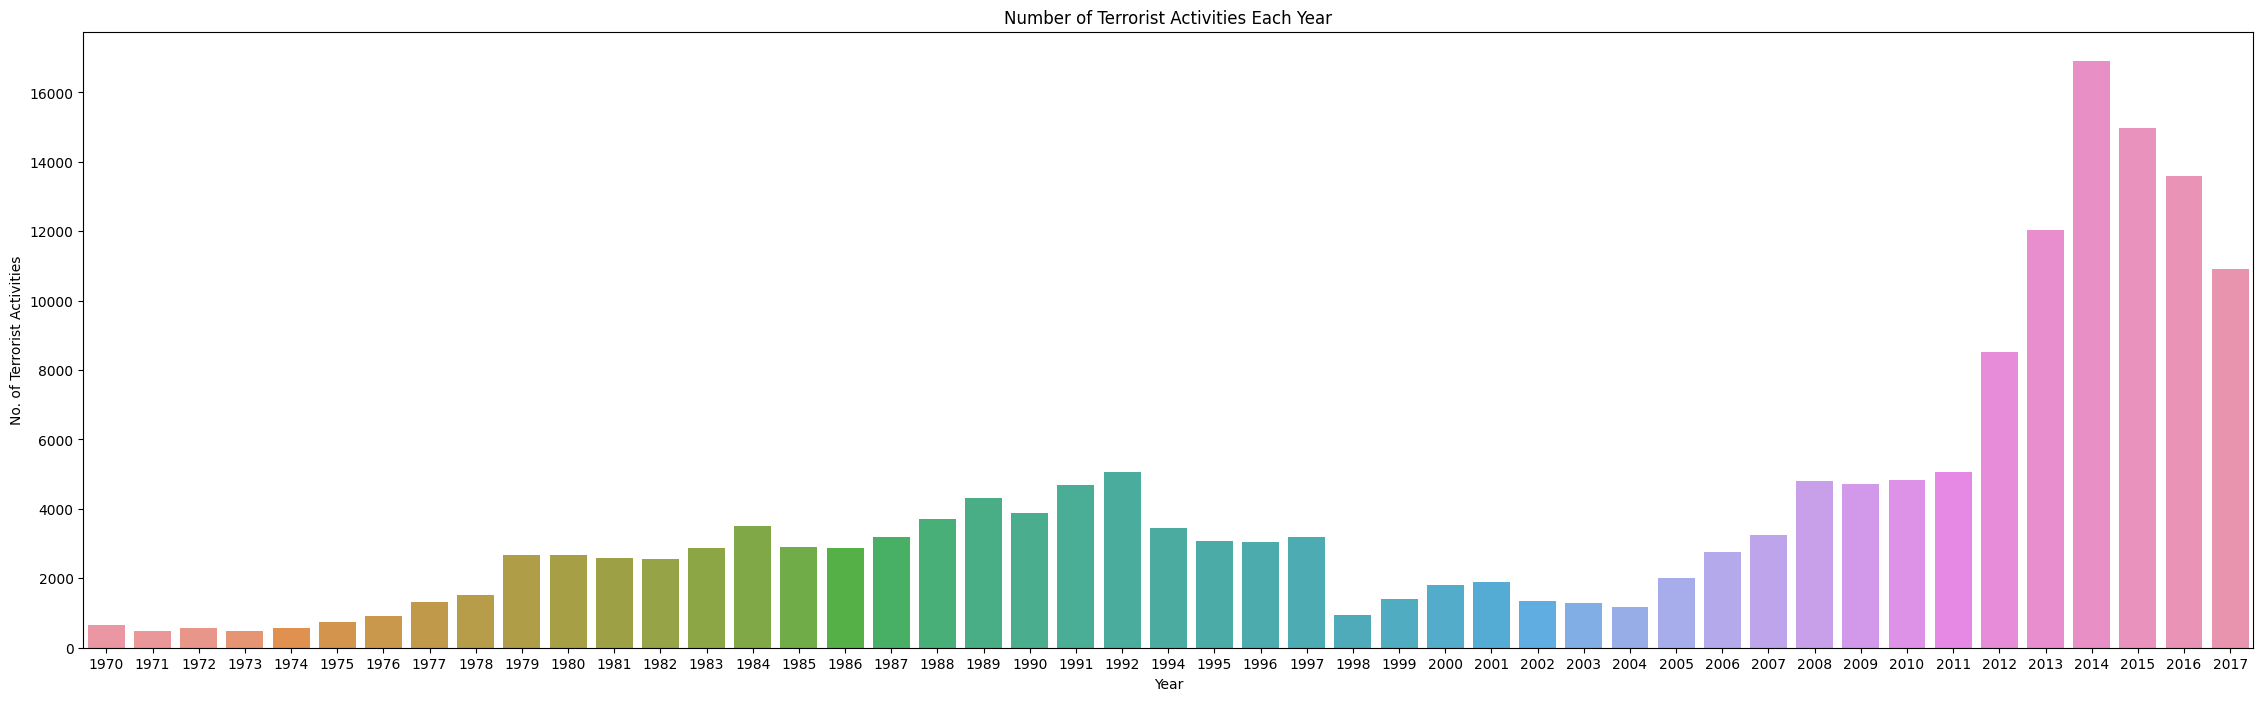

In [68]:
# Chart - 1 visualization code
plt.figure(figsize=(28,8))
sns.countplot(data=new_terror_data, x=new_terror_data.Year)
plt.ylabel('No. of Terrorist Activities')
plt.title("Number of Terrorist Activities Each Year")

##### 1. Why did you pick the specific chart?

Countplot shows the counts of observations in each categorical bin using bars. A countplot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

In the initial years, terrorist activities were low. After 1978, the terrorist activities grew and after 1997 terrorist activities fell significantly. In the later years, i.e. after 2008, the terrorist activities have increased 4x times with the highest being in 2016 which recored more than 16,000 terrorist activities.  

#### Chart - 2 - Terrorist Activities in Each Region

##### 1. Why did you pick the specific chart?

In [69]:
# Chart - 2 visualization code
import plotly.express as px
fig = px.area(pd.crosstab(index=new_terror_data.Year, columns=new_terror_data.Region), title='Terrorist Activities in Each Region per Year')
fig.show()

An area chart combines the line chart and bar chart to show how one or more groups numeric values change over the progression of a second variable, typically that of time. Area charts are commonly used to showcase data that depicts a time-series relationship. The point of the chart is to communicate an overall trend, not individual values. Area charts are ideal when the total figures are as important as the share of the figure.

##### 2. What is/are the insight(s) found from the chart?

1. The terrorist activities saw a rise between 1985 and 1995. We can see a huge rise in terrorist activities after the year 2010.
2. From 1985-1990, South America had most number of terrorist activities. This fell after 2000s.
3. Middle East & North Africa saw a meteoric rise in terrorist activities after 2005. Similar trend follow for South Asia too.
4. Australasia & Oceania and Central Asia have the least number of terrorist activities.

#### Chart - 3 - Top Countries with most number of Terrorist Activities

<Axes: title={'center': 'Top 20 Countries with most number of Terrorist Activities'}, xlabel='Countries', ylabel='No. of Terrorist Activities'>

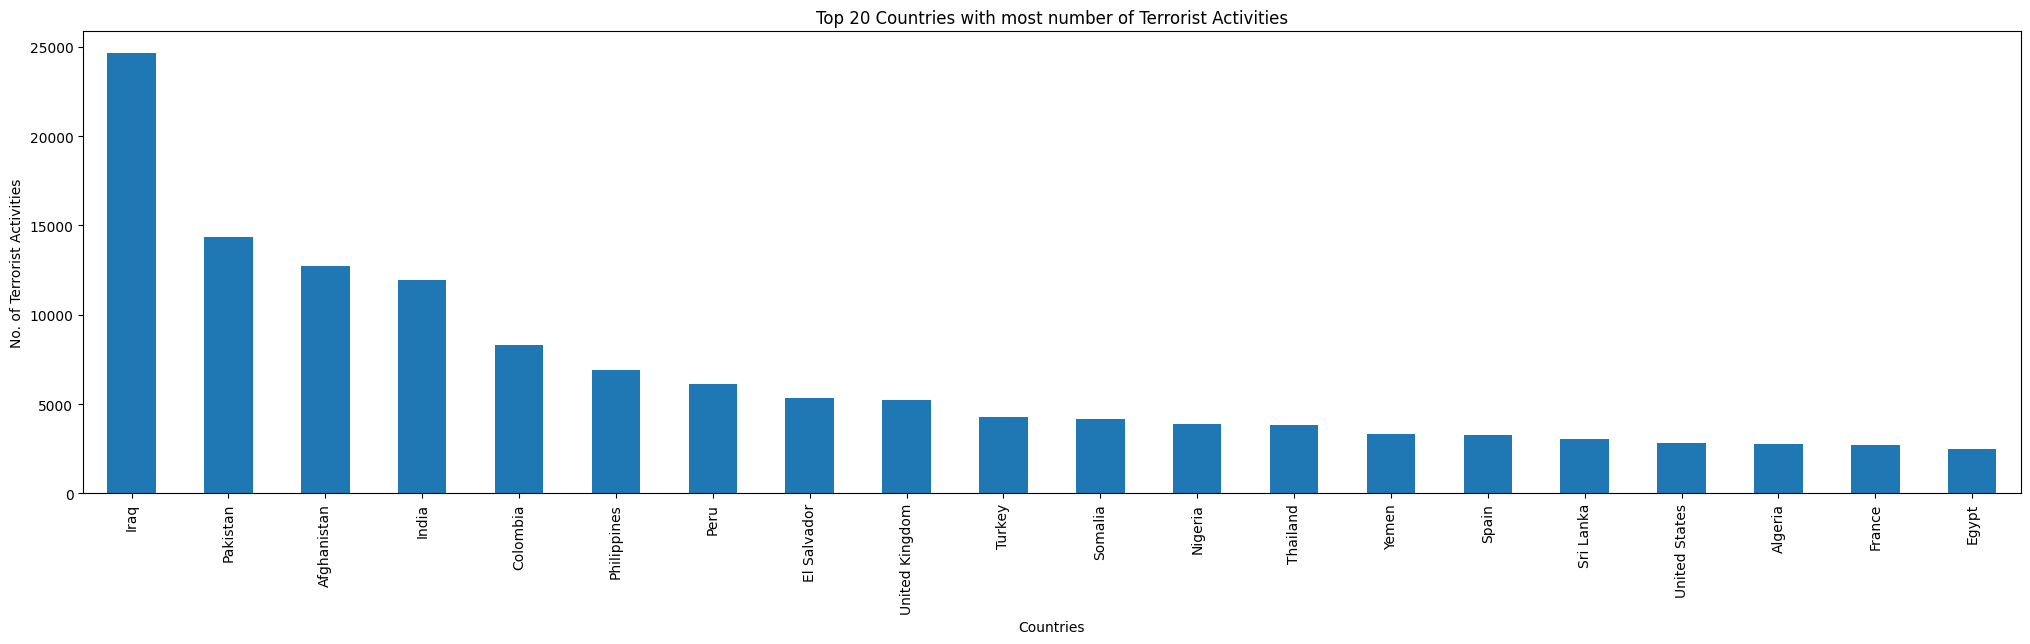

In [70]:
# Chart - 3 visualization code
new_terror_data.Country.value_counts().head(20).plot(kind='bar', figsize=(25,6),
                                                     title='Top 20 Countries with most number of Terrorist Activities', xlabel='Countries', ylabel='No. of Terrorist Activities')

##### 1. Why did you pick the specific chart?

A simple bar plot is used for showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.

##### 2. What is/are the insight(s) found from the chart?

Iraq, Pakistan, Afghanistan and India lead with the most number of terrorist activities in the world.

#### Chart - 4 - Most Affected Target Types

Text(0.5, 1.0, 'Most Affected Target Types')

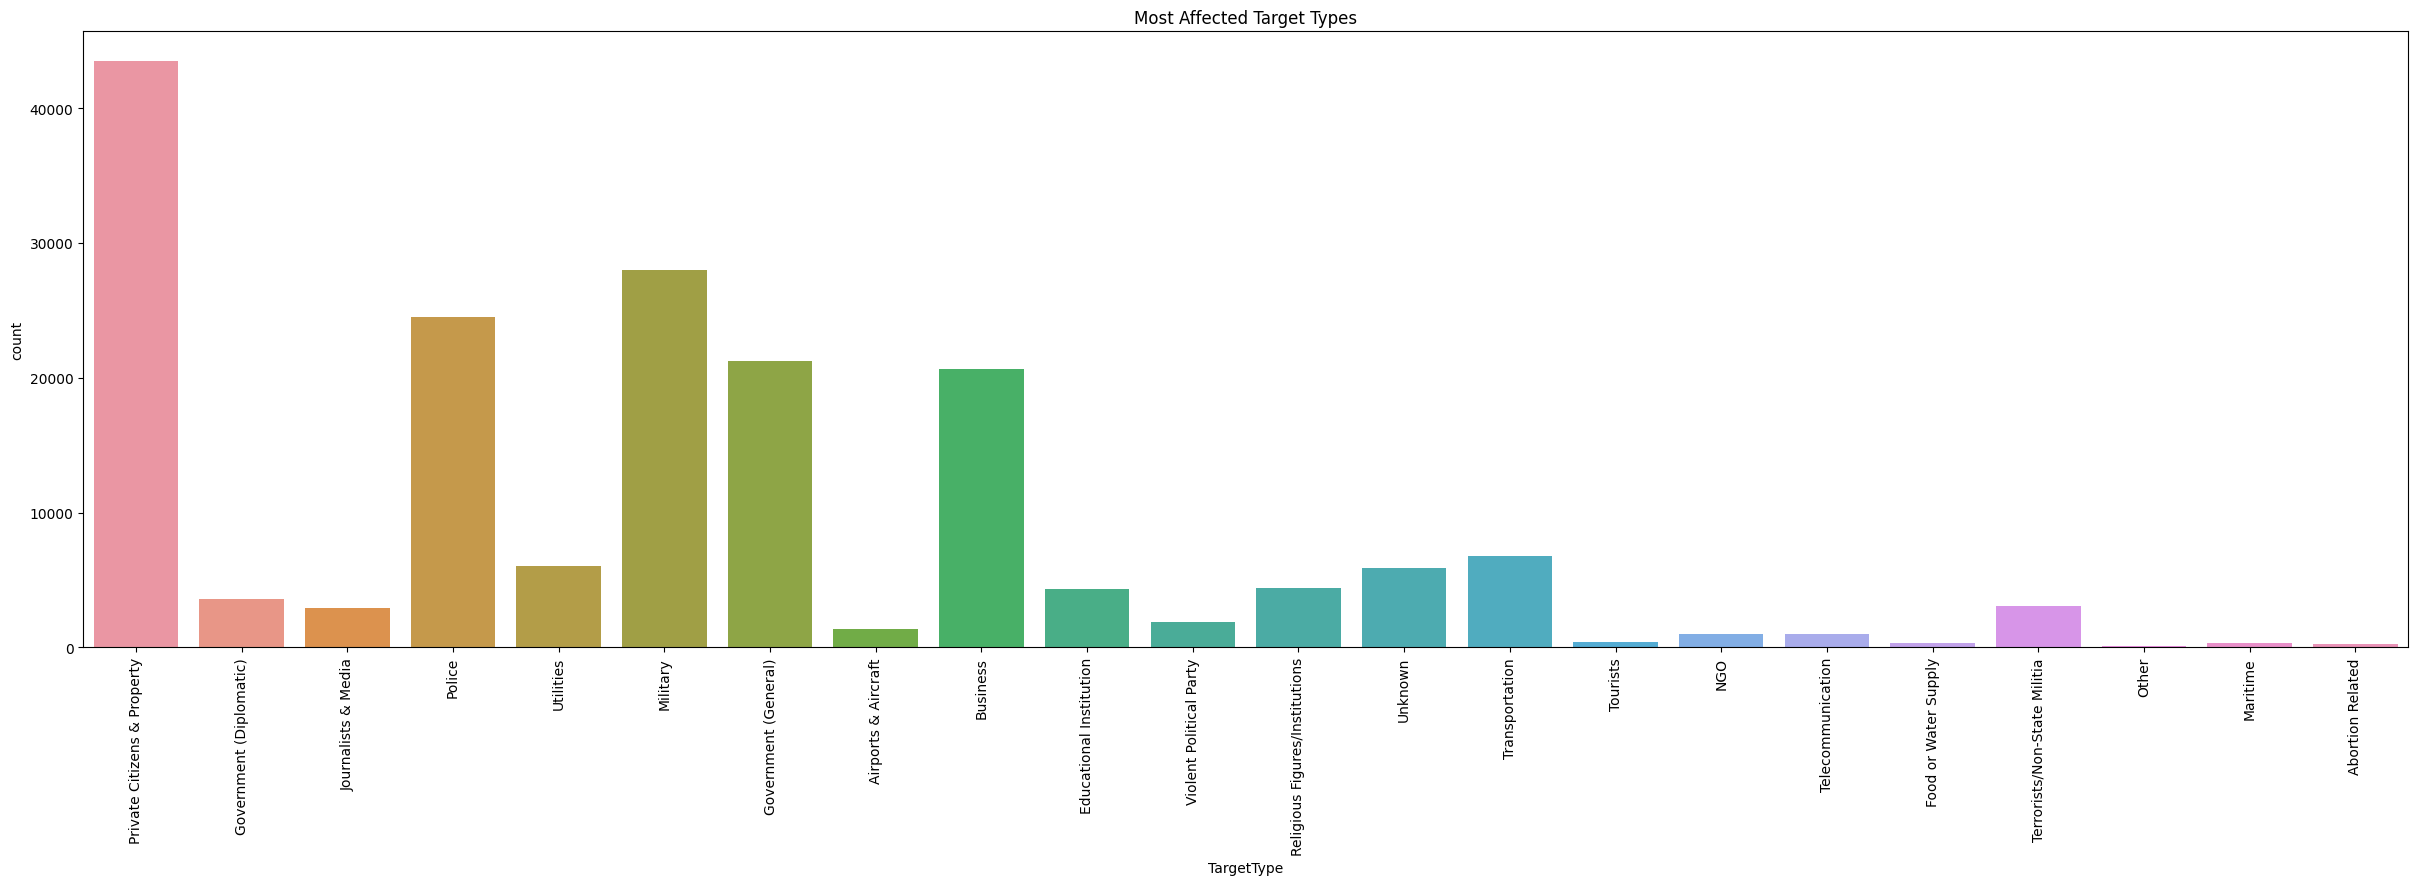

In [71]:
# Chart - 4 visualization code
plt.figure(figsize=(30,8))
sns.countplot(data=new_terror_data, x=new_terror_data.TargetType)
plt.xticks(rotation=90)
plt.title('Most Affected Target Types')

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable. It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

Private Citizens & Property, Military and Police are preferred as targets for terrorist activities.

#### Chart - 5 - Top Weapons Used

In [72]:
weapons = new_terror_data.WeaponType.value_counts()[:6].to_frame().reset_index()
weapons.columns = ['WeaponType', 'Count']

weapons

,WeaponType,Count
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321


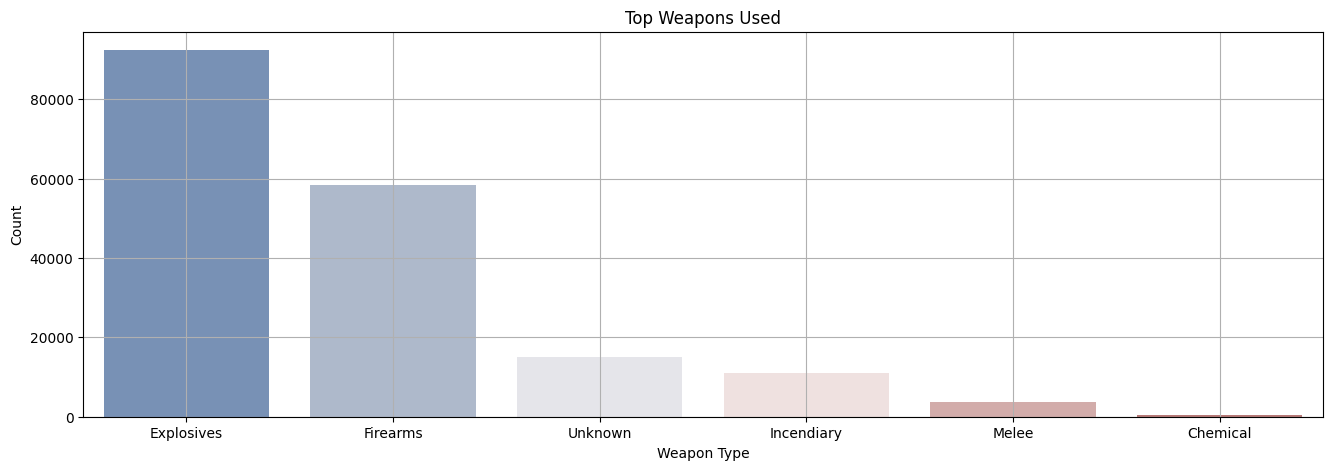

In [73]:
# Chart - 5 visualization code
plt.subplots(figsize=(16,5))
sns.barplot(data=weapons,
              x=weapons.WeaponType,
              y=weapons.Count,
              palette='vlag')

plt.title("Top Weapons Used")
plt.xlabel("Weapon Type")
plt.ylabel("Count")
plt.grid()

##### 1. Why did you pick the specific chart?

Bar graphs are an extremely effective visual to use in presentations and reports. Bar charts should be used when you are showing segments of information.

##### 2. What is/are the insight(s) found from the chart?

Explosives and Firearms are two most used weapons used for terrorist activities.

#### Chart - 6 - Favorite Attack Methods

Text(0.5, 1.0, 'Favorite Attack Methods')

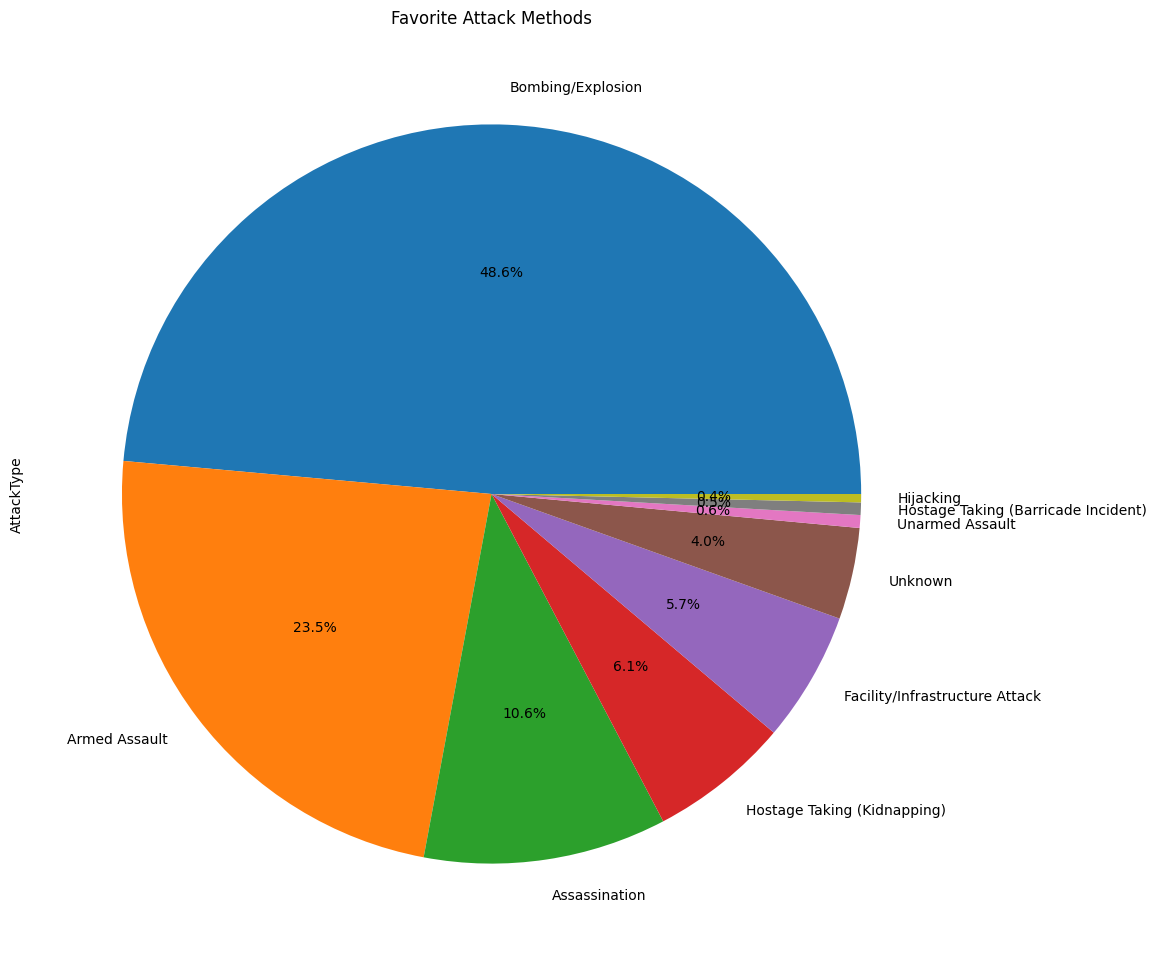

In [74]:
# Chart - 6 visualization code
new_terror_data['AttackType'].value_counts().plot(kind='pie',figsize=[12,12],autopct='%1.1f%%')
plt.title("Favorite Attack Methods")

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. True to the name, this kind of visualization uses a circle to represent the whole, and slices of that circle, or “pie”, to represent the specific categories that compose the whole.

##### 2. What is/are the insight(s) found from the chart?

Bombing/Explosion, Armed Assault and Assassination are the 3 most favorite attack methods in any terrorist activities.

#### Chart - 7 - Terrorist Groups with Highest Terror Attacks

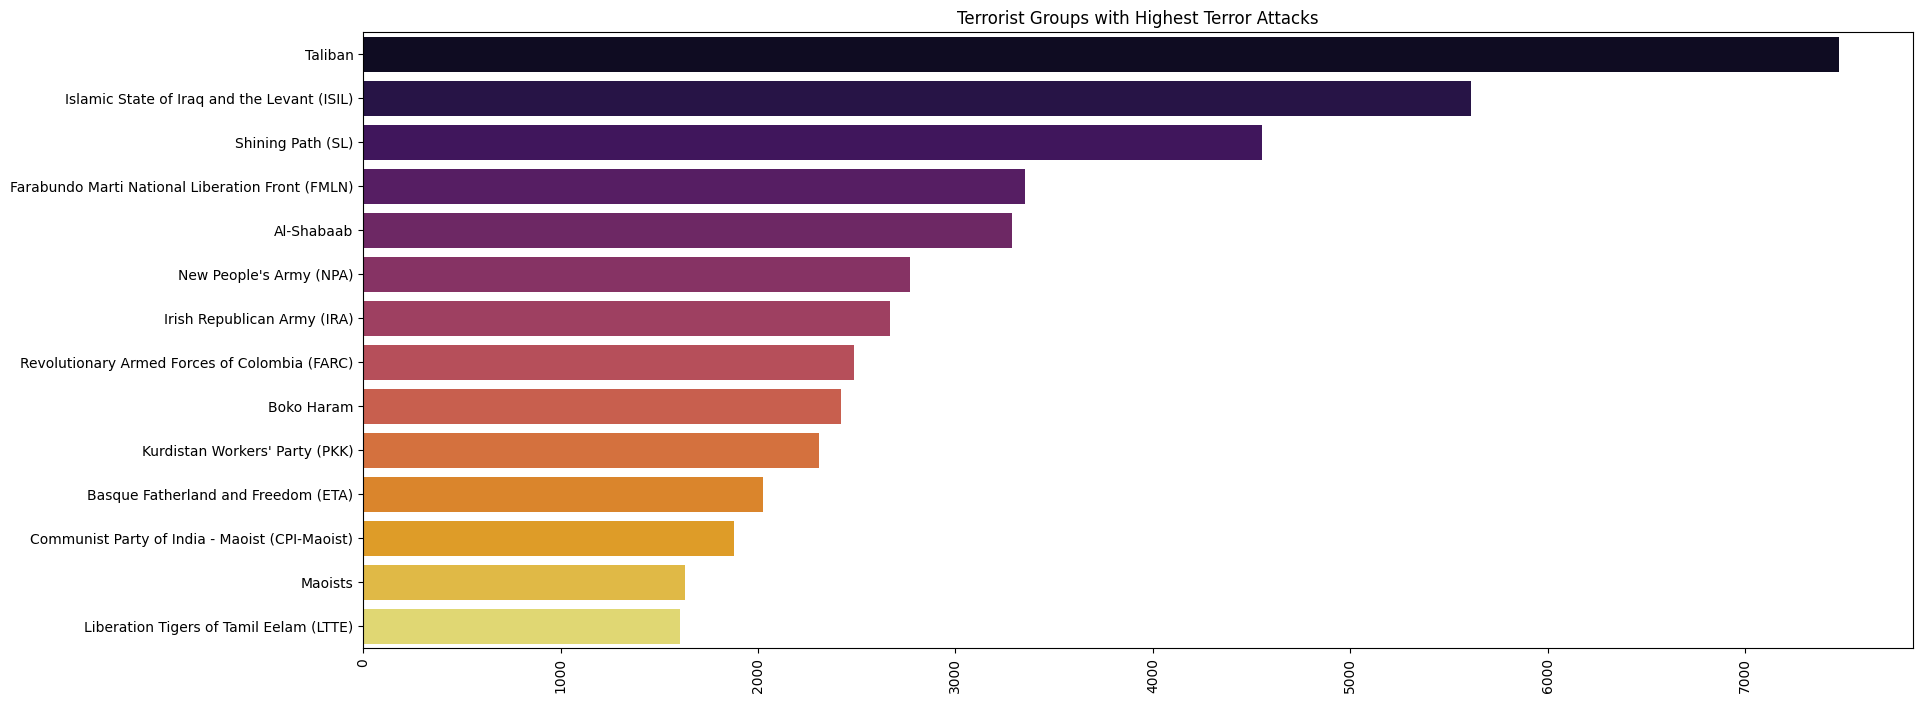

In [75]:
# Chart - 7 visualization code
sns.barplot(x=new_terror_data['GroupName'].value_counts()[1:15].values,y=new_terror_data['GroupName'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are an extremely effective visual to use in presentations and reports. Bar charts should be used when you are showing segments of information.

##### 2. What is/are the insight(s) found from the chart?

Taliban, ISIL and Shining Path are the 3 most notorious groups involved in terrorist activities.

#### Chart - 8 - Weapons preferred by different terrorist group

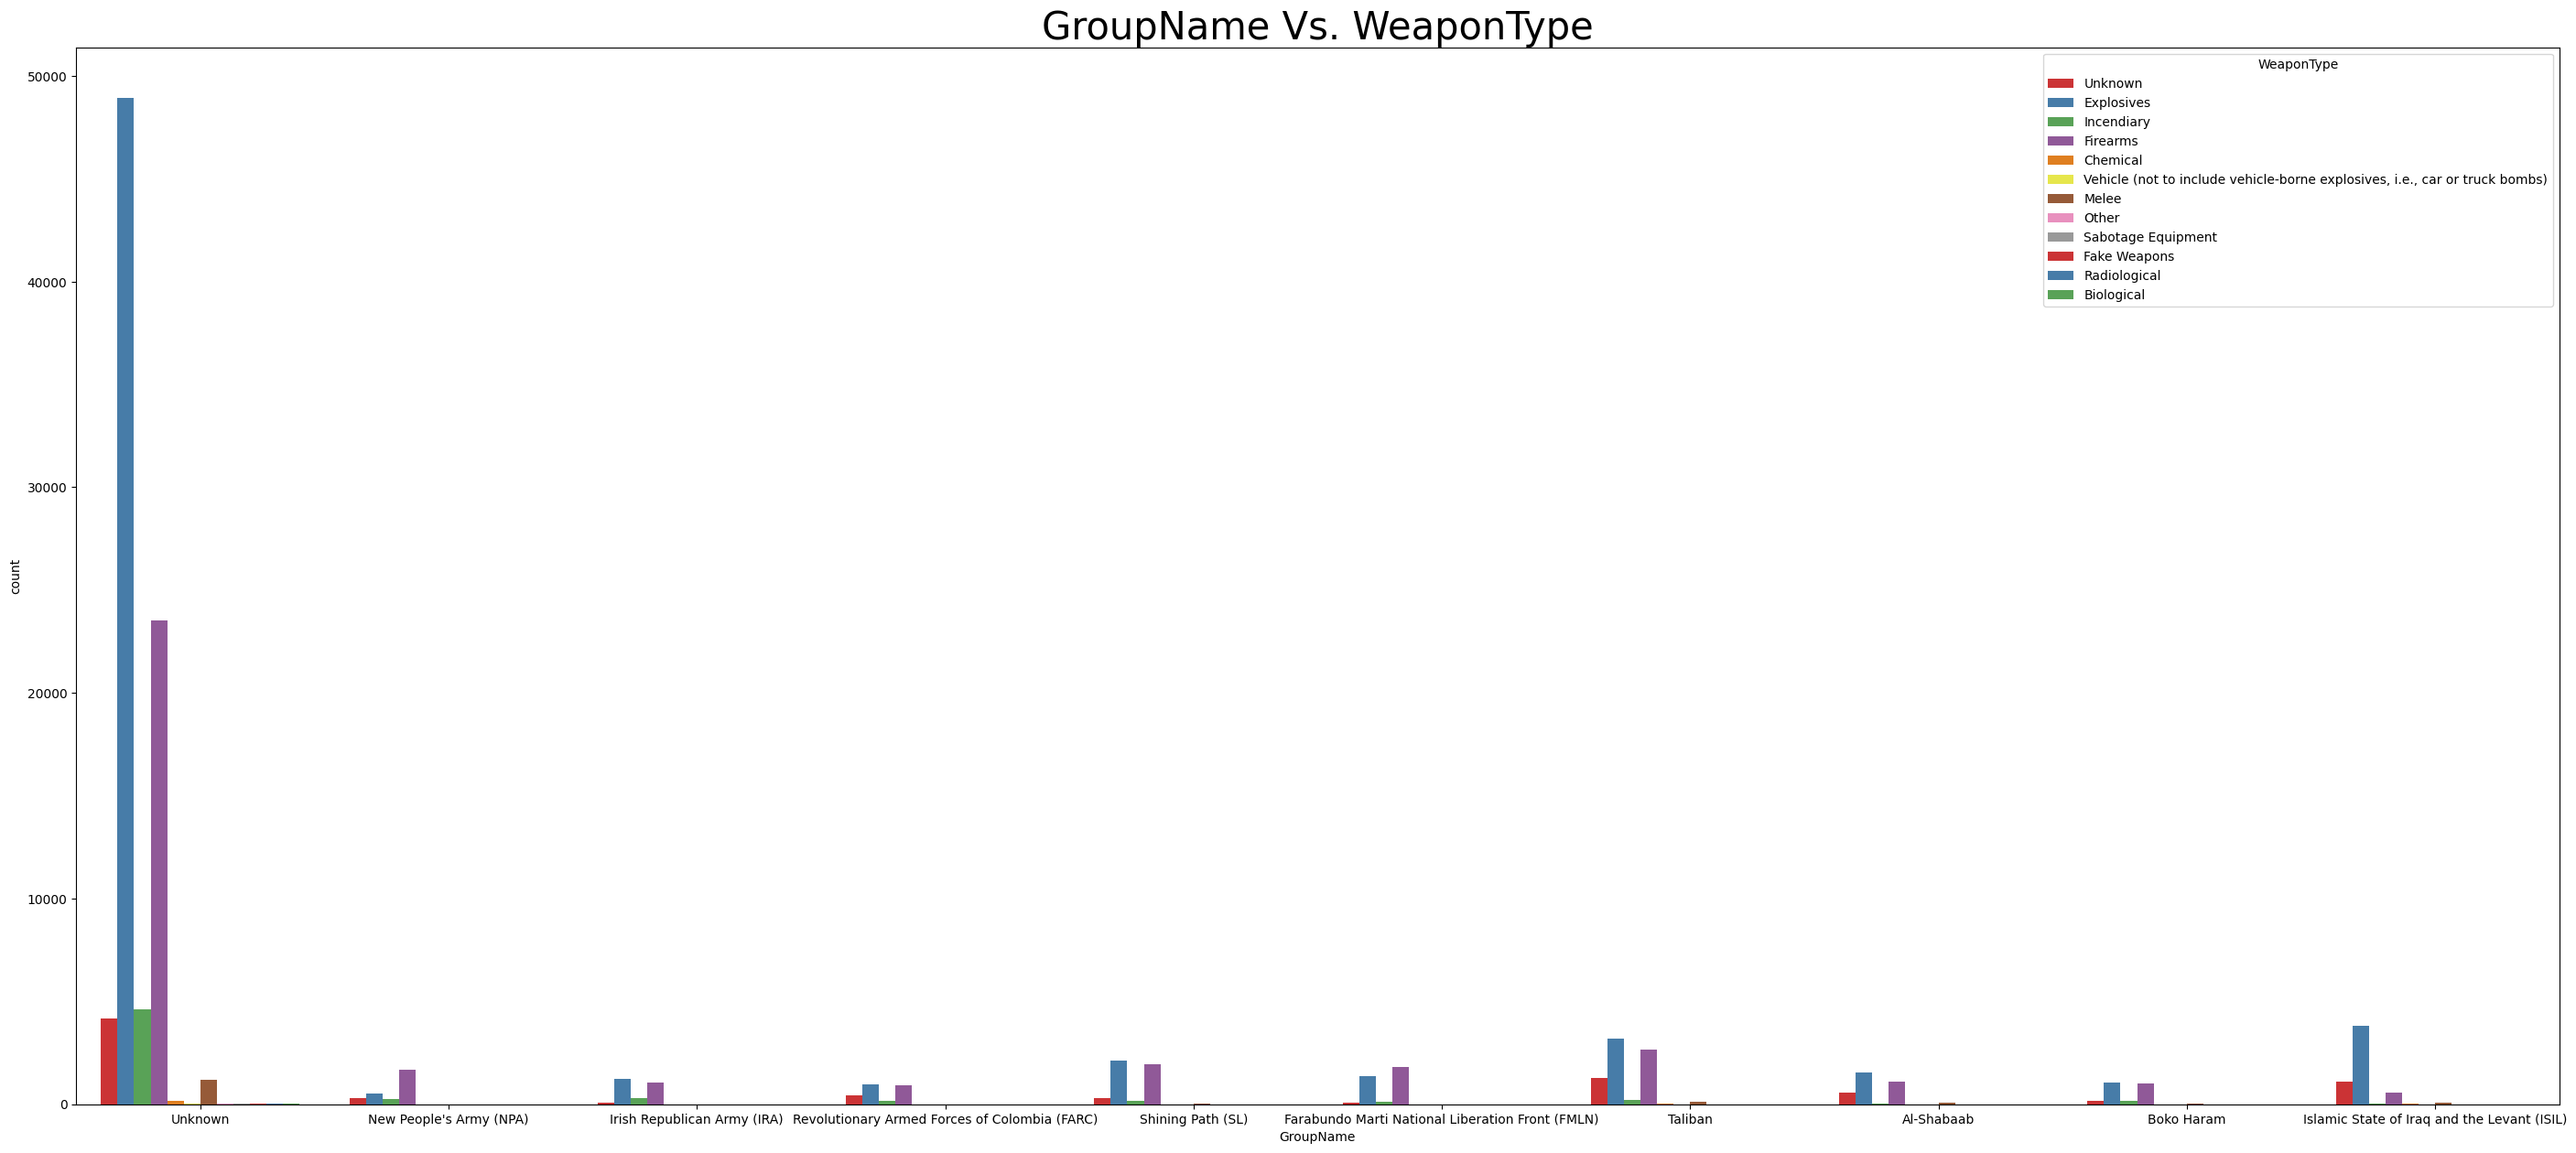

In [76]:
# Chart - 8 visualization code
plt.subplots(figsize = (35,15))
Top_10_Group = new_terror_data['GroupName'].value_counts().index.tolist()[0:10]
snap = new_terror_data[['GroupName','WeaponType']]
AttackG_Weapon = snap[snap['GroupName'].isin(Top_10_Group)]
sns.countplot(x='GroupName', hue ='WeaponType', data = AttackG_Weapon,palette = "Set1")
plt.title('GroupName Vs. WeaponType', fontsize = 30)
plt.show()

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

Terrorist groups like Taliban, ISIL, Shining Path use Explosives as their weapon type for terrorist activities.

#### Chart - 9 - Which weapons are used oftenly in a region

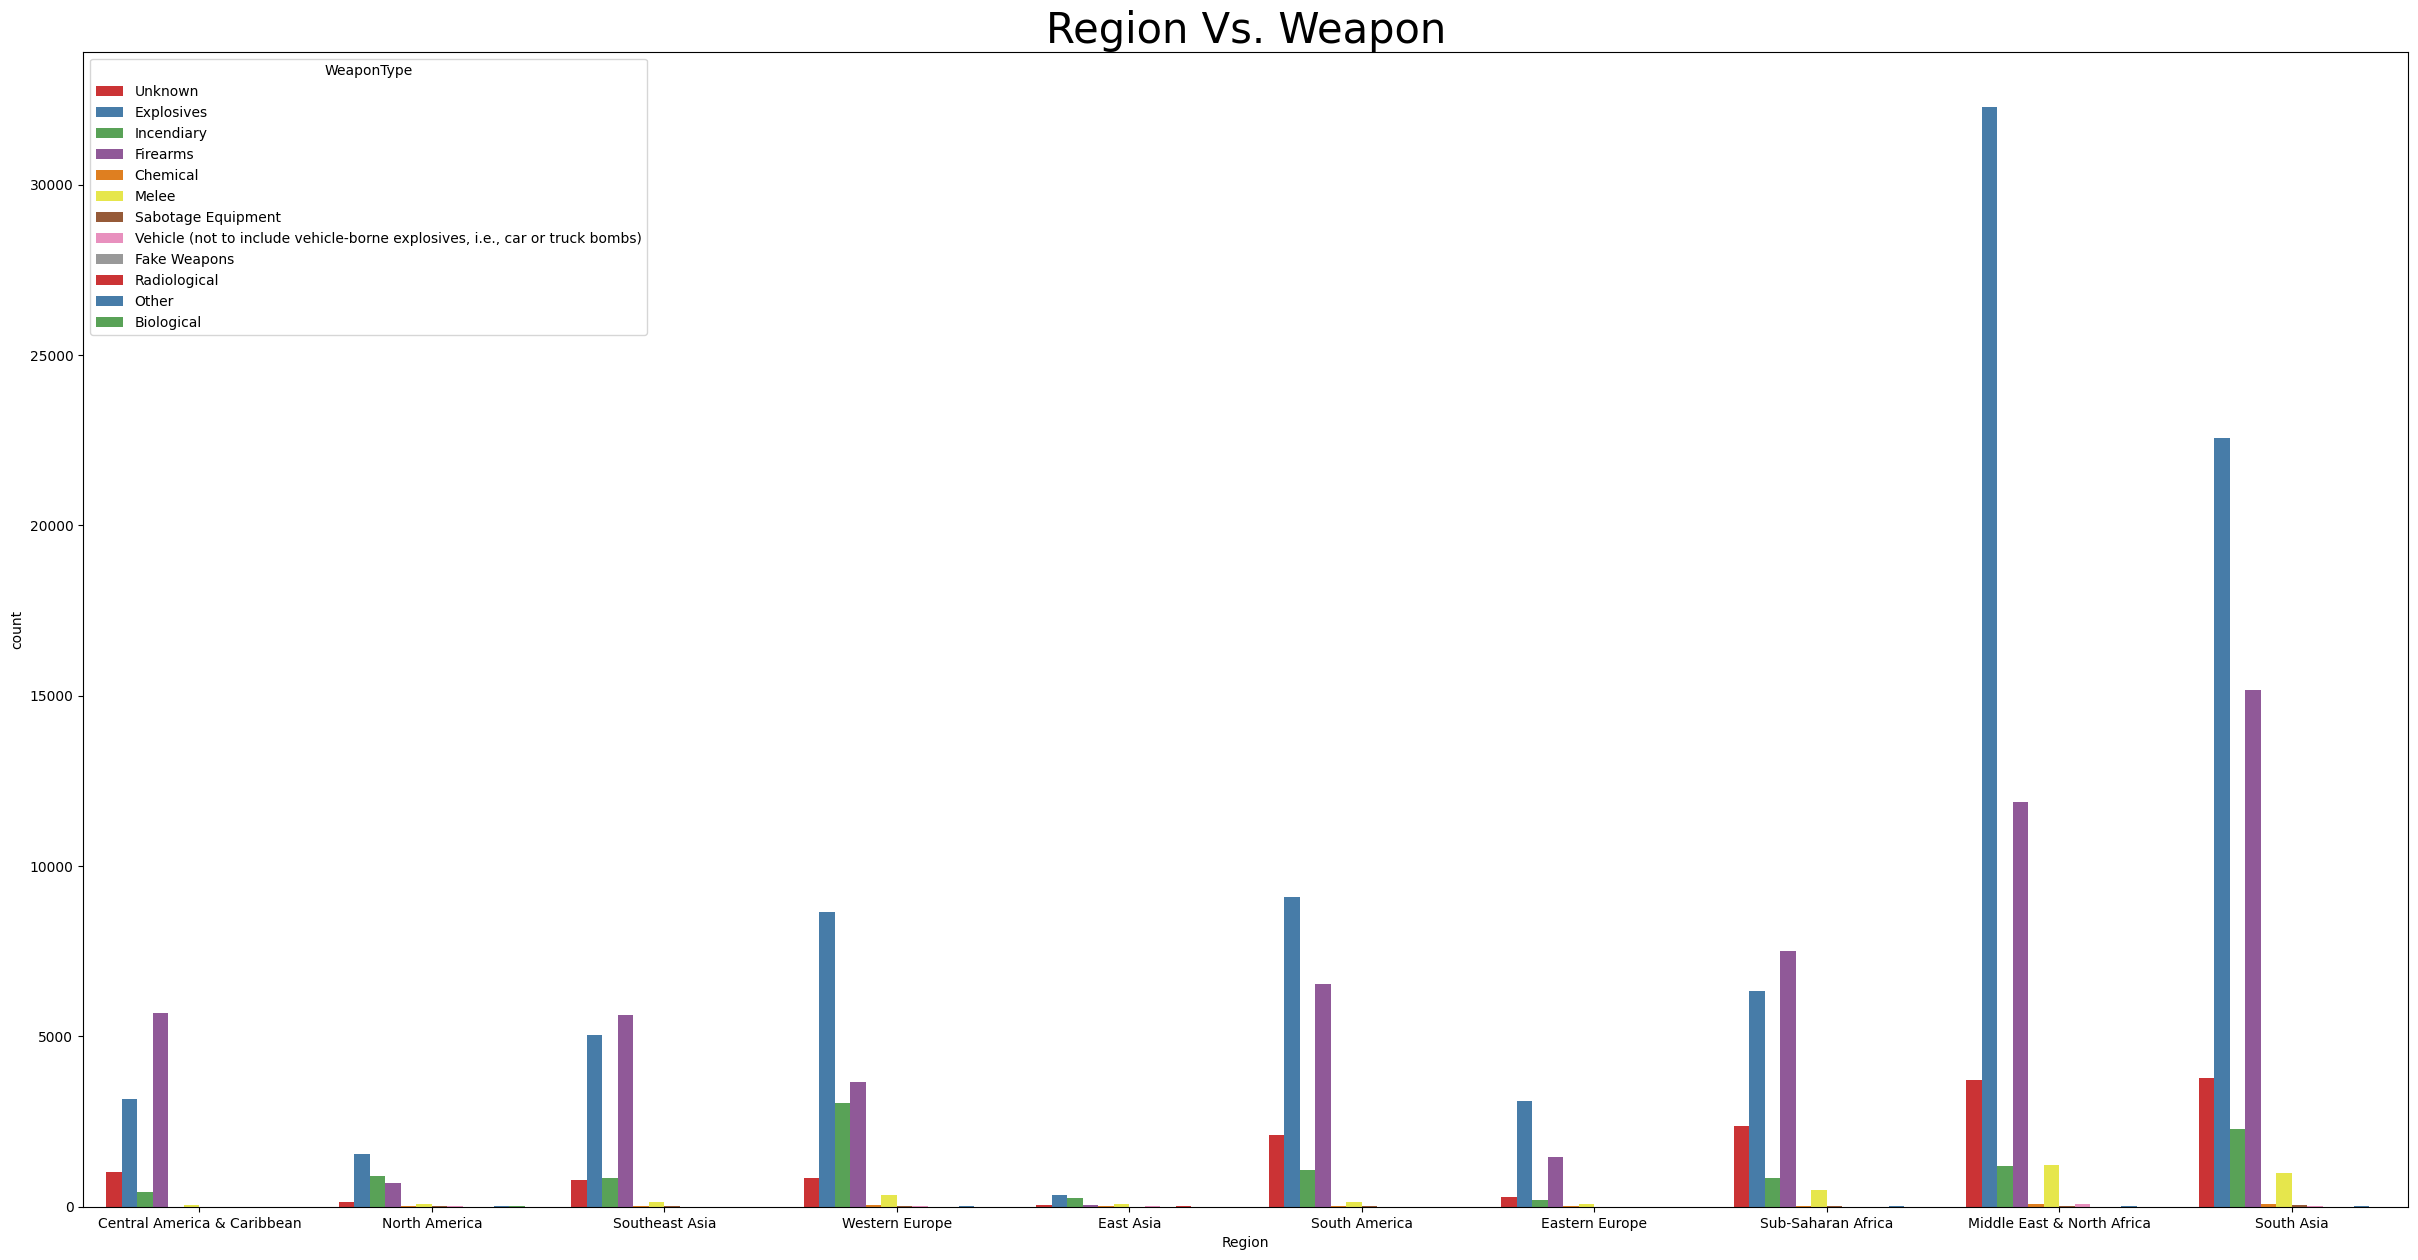

In [77]:
# Chart - 9 visualization code
plt.subplots(figsize=(30,15))
group_10 = new_terror_data['Region'].value_counts().index.tolist()[0:10]
snap1 = new_terror_data[['Region','WeaponType']]
AttkGWeapon = snap1[snap1['Region'].isin(group_10)]
sns.countplot(x='Region', hue='WeaponType', data=AttkGWeapon, palette='Set1')
plt.title('Region Vs. Weapon', fontsize=30)
plt.show()

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

In all the regions mentioned, Explosives is the most common type of weapon for any terrorist activities.

#### Chart - 10 - Terrorist Group Active over the years and their trends

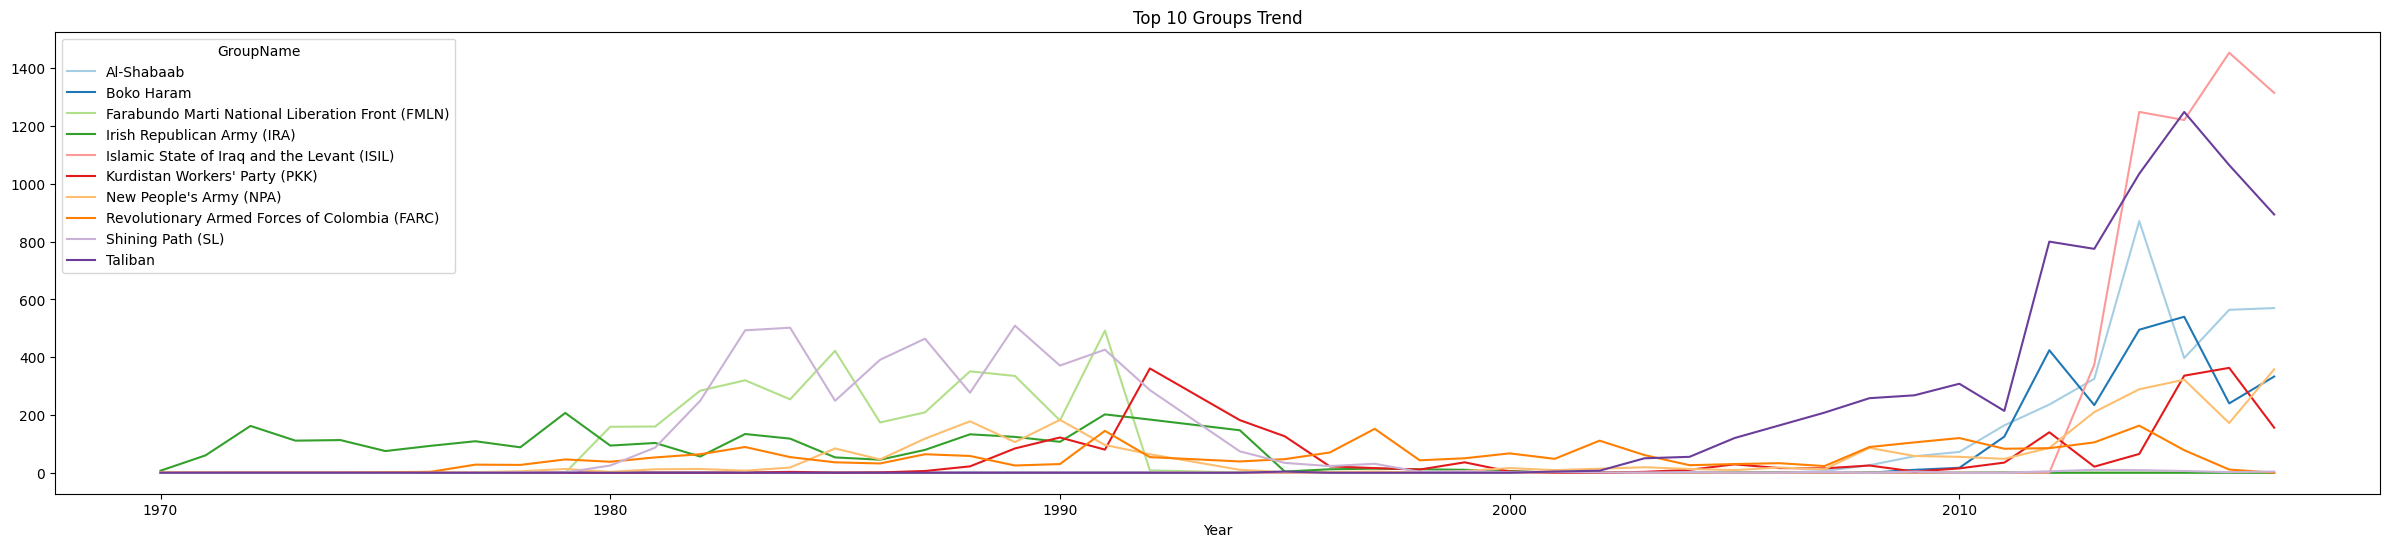

In [78]:
# Chart - 10 visualization code
top_groups10=new_terror_data[new_terror_data['GroupName'].isin(new_terror_data['GroupName'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.GroupName).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(30,6)
plt.title("Top 10 Groups Trend")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1. Terror group like Irish Republican Army(IRA) and Farabundo Marti National Liberation Front(FMLN) has been completely wiped out. They were active from 1970 to 1995.
2. Terror group like Taliban, ISIL, Al-Shabaab became active only after 2000s.

#### Chart - 11 - Number of people killed by terrorists group

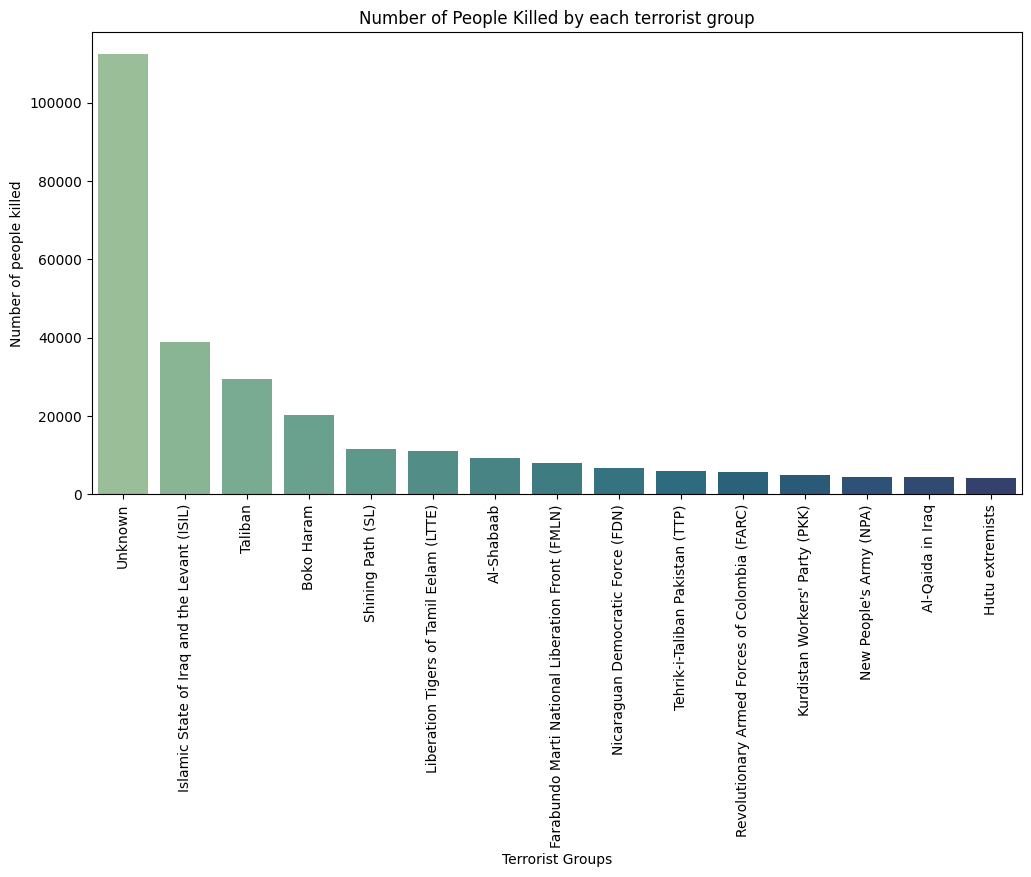

In [79]:
# Chart - 11 visualization code
group_killed= new_terror_data[['GroupName','Killed']].groupby(['GroupName'],axis=0).sum().sort_values('Killed', ascending=False).head(15)
plt.subplots(figsize=(12,6))
sns.barplot(x=group_killed.index, y=group_killed.Killed.values,palette="crest")
plt.title('Number of People Killed by each terrorist group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Most of the attacks have been unknowns. Amongst the known ones, ISIL, Taliban and Boko Haram has killed the most number of people.

#### Chart - 12 - Analysis of Terrorist Activities - India

In [80]:
#Creating a new DataFrame by applying the filter ['Country'] == 'India'. It will be easy for us to analyse terror activities in India
terror_data_India = new_terror_data.loc[new_terror_data['Country'] == 'India']
terror_data_India.head()

,Year,Month,Day,Country,Region,State,City,AttackType,TargetType,TargetSubType,Nationality,WeaponType,Killed,US_CitizensKilled,Wounded,GroupName,Claimed
1186,1972,2,22,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Germany,Explosives,0.0,0.0,0.0,Palestinians,NaN
2764,1975,1,2,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),"Government Personnel (excluding police, military)",India,Explosives,4.0,0.0,0.0,Ananda Marga,0.0
3857,1976,5,26,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,Airport,India,Explosives,0.0,0.0,0.0,Unknown,NaN
5327,1977,9,28,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Japan,Firearms,0.0,0.0,0.0,Japanese Red Army (JRA),NaN
7337,1979,1,13,India,South Asia,Assam,Unknown,Armed Assault,Police,Police Patrol (including vehicles and convoys),India,Firearms,0.0,0.0,0.0,Naga People,NaN


<Axes: title={'center': 'Top 10 States with most number of Terrorist Activities'}, xlabel='States', ylabel='No. of Terrorist Activities'>

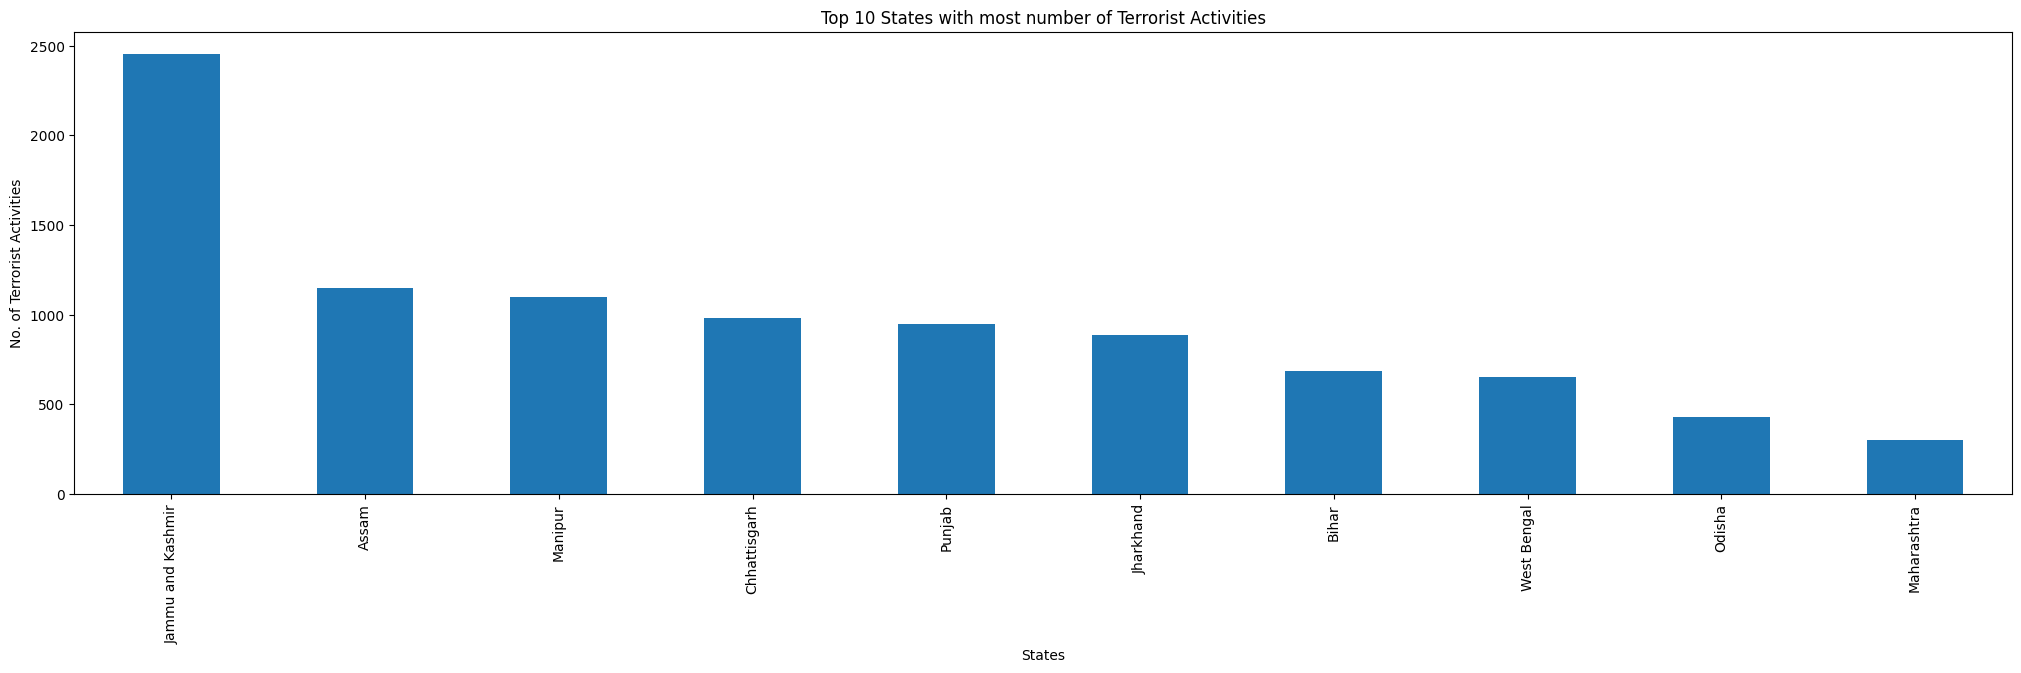

In [81]:
# Chart - 12 visualization code
terror_data_India.State.value_counts().head(10).plot(kind='bar', figsize=(25,6),
                                                     title='Top 10 States with most number of Terrorist Activities', xlabel='States', ylabel='No. of Terrorist Activities')

##### 2. What is/are the insight(s) found from the chart?

Jammu and Kashmir, Assam and Manipur leads the way for maximum number of terror activities.

#### Chart - 13 - Part of India which has Most Number of Terrorist Activities

In [82]:
# Checking the unique states of India
terror_data_India.State.unique()

array(['Delhi', 'Bihar', 'Maharashtra', 'Assam', 'Manipur', 'Mizoram',
       'Andhra Pradesh', 'Unknown', 'Jharkhand', 'Tamil Nadu',
       'Uttar Pradesh', 'West Bengal', 'Nagaland', 'Gujarat',
       'Chandigarh', 'Rajasthan', 'Punjab', 'Chhattisgarh', 'Tripura',
       'Haryana', 'Jammu and Kashmir', 'Himachal Pradesh', 'Karnataka',
       'Uttaranchal', 'Madhya Pradesh', 'Orissa', 'Kerala', 'Odisha',
       'Meghalaya', 'Sikkim', 'Goa', 'Andhra pradesh',
       'Arunachal Pradesh', 'Puducherry', 'Telangana'], dtype=object)

In [83]:
# Creating an empty list and then running If-Else condition which will categorise the state into North India or South India
part_India = []
for row in terror_data_India['State']:
  if row in ['Delhi', 'Bihar', 'Jharkhand','Uttar Pradesh', 'West Bengal','Gujarat', 'Chandigarh', 'Rajasthan', 'Punjab', 'Chhattisgarh','Haryana', 'Jammu and Kashmir', 'Himachal Pradesh','Uttaranchal', 'Madhya Pradesh']:
    part_India.append('North India')
  elif row in ['Puducherry', 'Telangana', 'Maharashtra', 'Tamil Nadu','Karnataka','Kerala','Goa', 'Andhra pradesh']:
    part_India.append('South India')
  else:
    part_India.append('Unknown')


In [84]:
# Creating a new column based on the condition on the previous cell
terror_data_India['part_India'] = part_India

<ipython-input-84-a0340107fea6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
# New column has been created
terror_data_India.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11960 entries, 1186 to 181689
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               11960 non-null  int64  
 1   Month              11960 non-null  int64  
 2   Day                11960 non-null  int64  
 3   Country            11960 non-null  object 
 4   Region             11960 non-null  object 
 5   State              11960 non-null  object 
 6   City               11960 non-null  object 
 7   AttackType         11960 non-null  object 
 8   TargetType         11960 non-null  object 
 9   TargetSubType      11960 non-null  object 
 10  Nationality        11960 non-null  object 
 11  WeaponType         11960 non-null  object 
 12  Killed             11960 non-null  float64
 13  US_CitizensKilled  11960 non-null  float64
 14  Wounded            11960 non-null  float64
 15  GroupName          11960 non-null  object 
 16  Claimed           

Text(0.5, 1.0, 'Indian Region with most number of attacks')

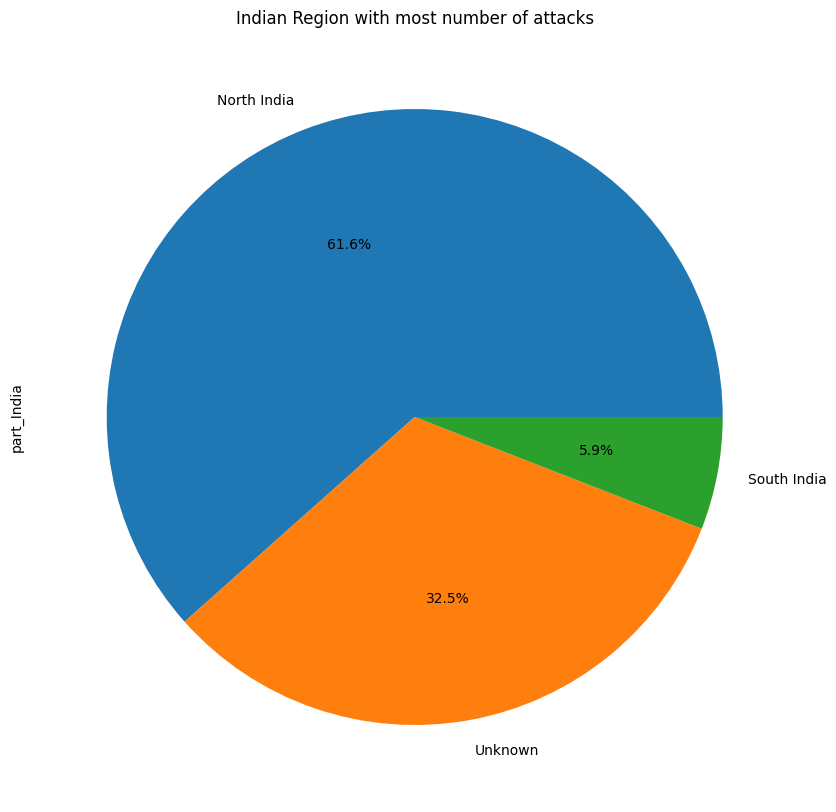

In [86]:
terror_data_India['part_India'].value_counts().plot(kind='pie',figsize=[10,10],autopct='%1.1f%%')
plt.title("Indian Region with most number of attacks")

#### Chart - 14 - Correlation Heatmap

<ipython-input-87-67707ba31316>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

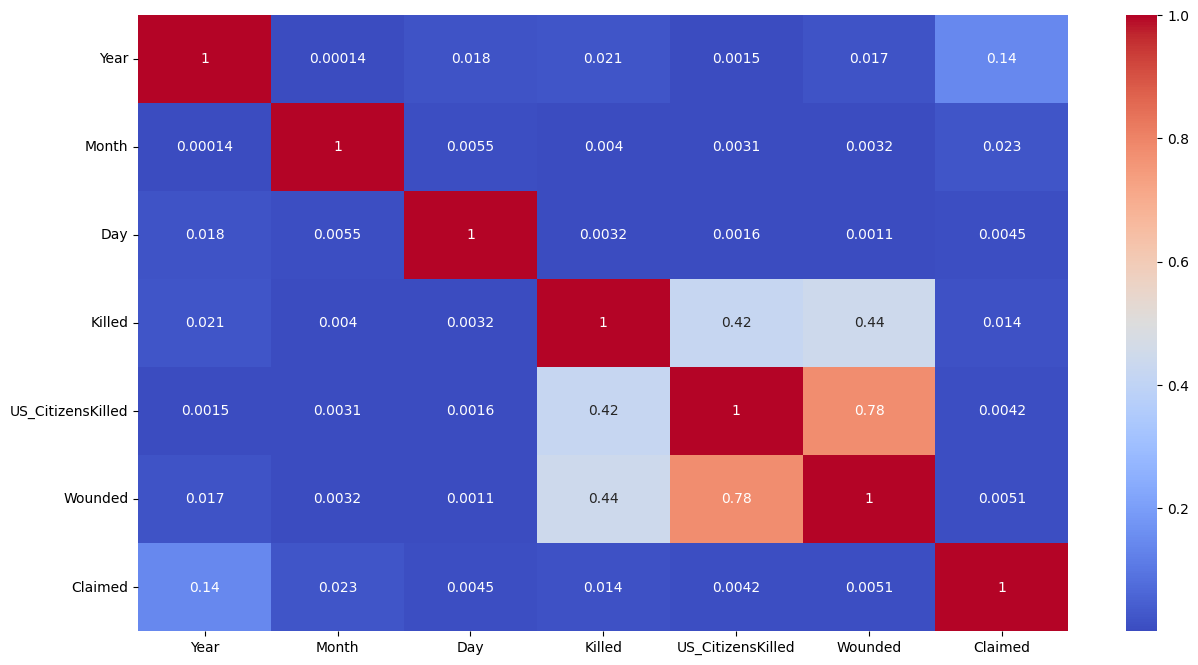

In [87]:
plt.figure(figsize=(15,8))
correlation1 = new_terror_data.corr()
sns.heatmap(abs(correlation1), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmap visualization enables data to be presented visually which allows us to easily consume information and make more sense of it. A heat map represents coeffecients to visualise the strength of correlation among variables.

#### Chart - 15 - Pair Plot

<Figure size 1500x800 with 0 Axes>

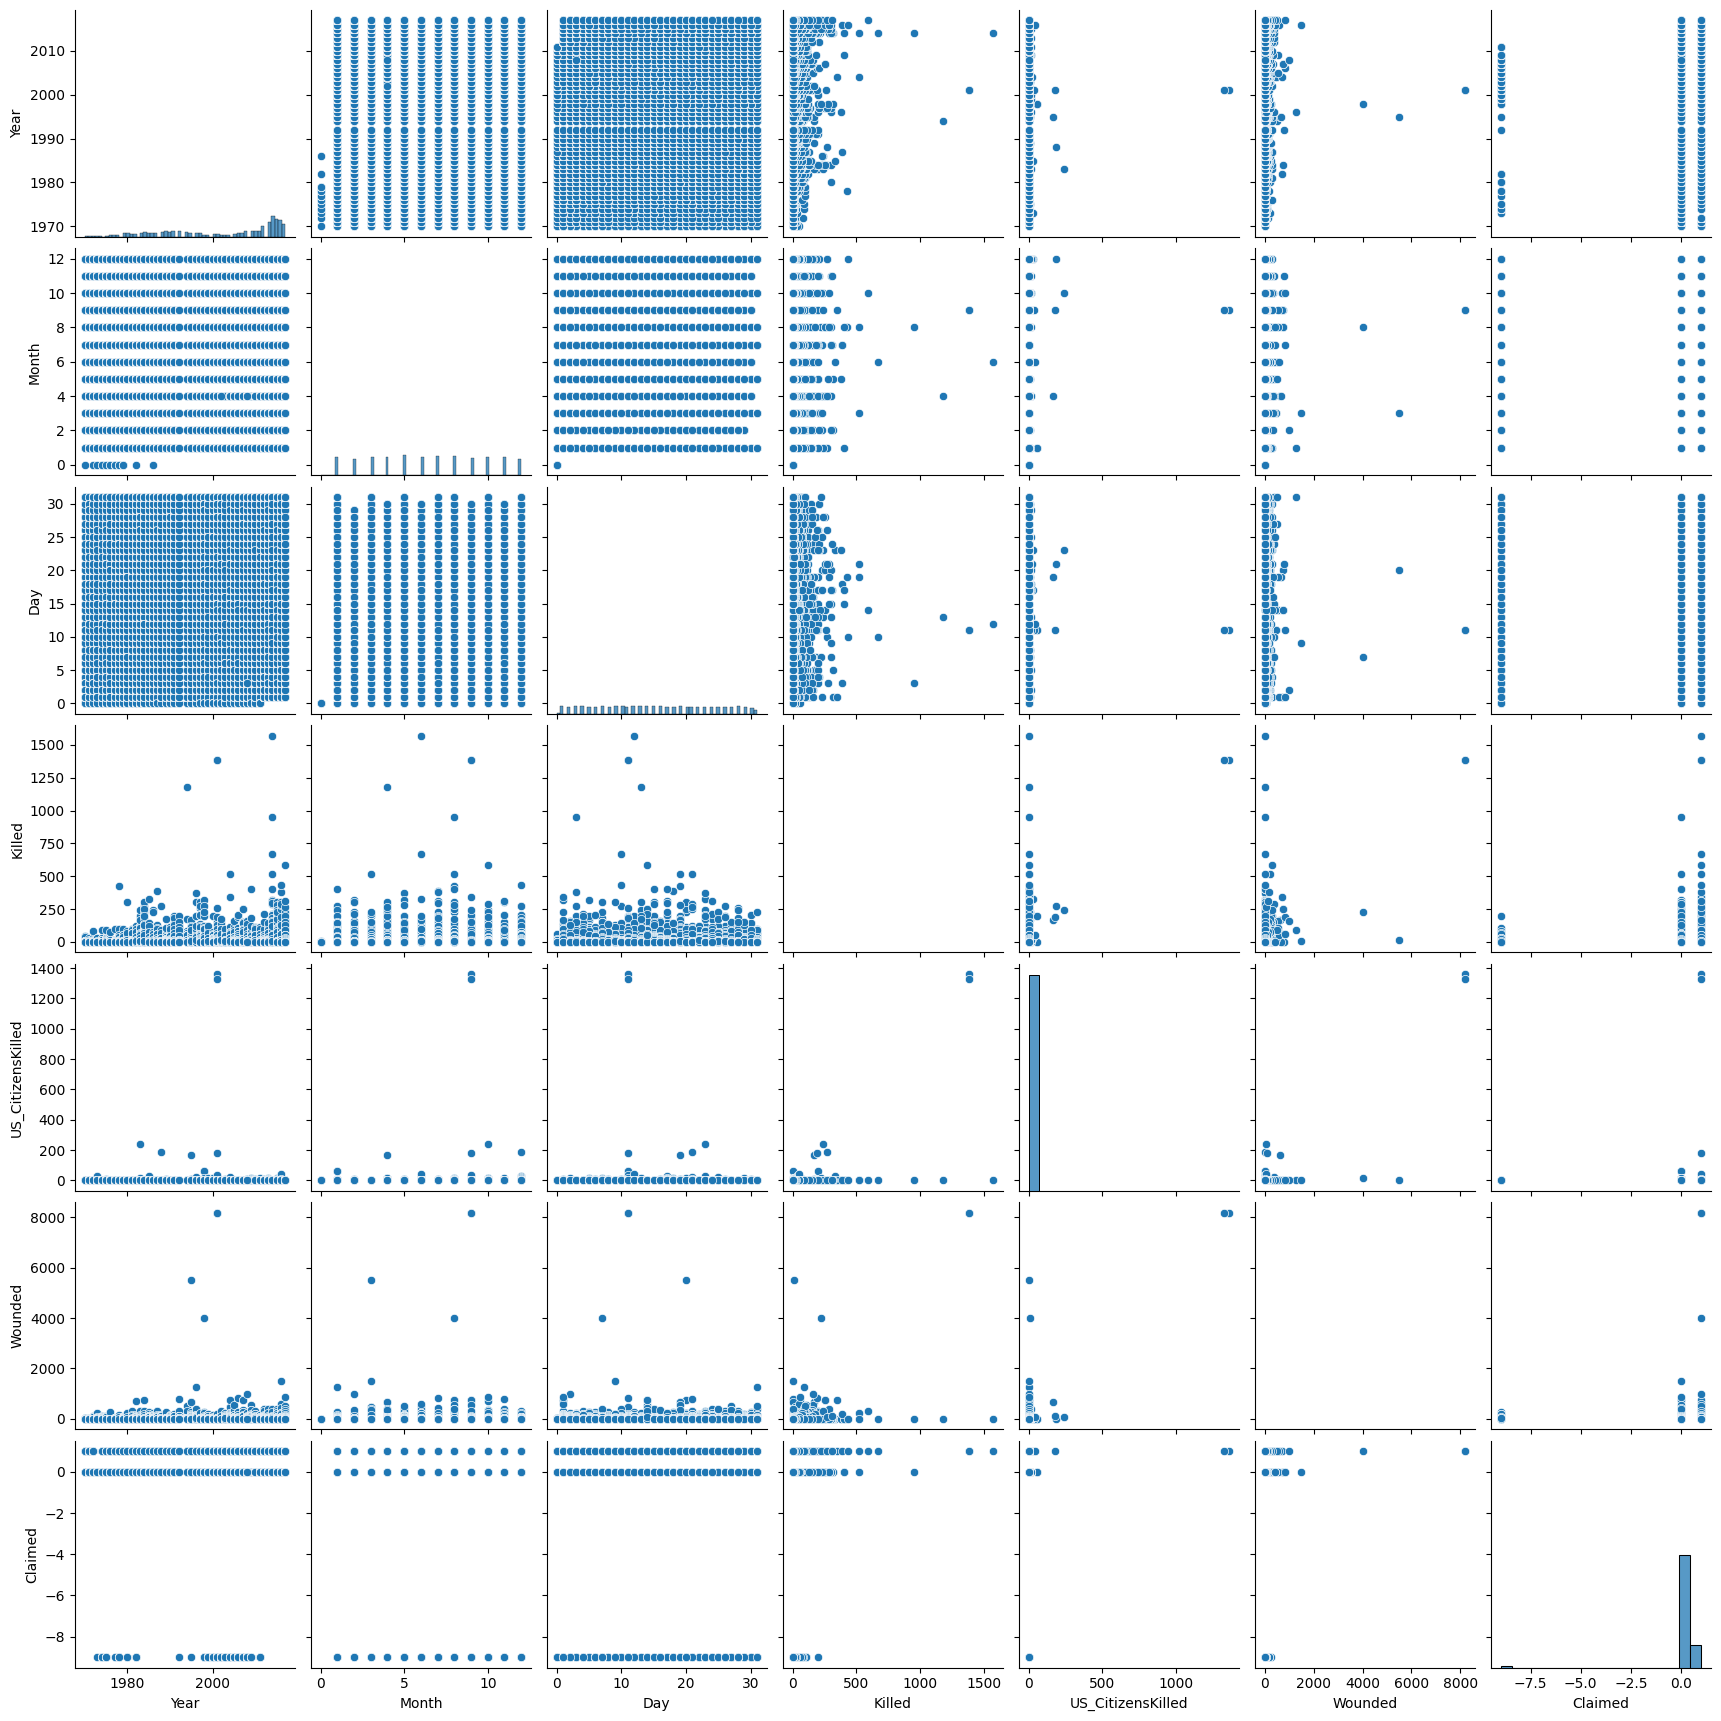

In [88]:
# Pair Plot visualization code
# plt.figure(figsize=[15,8])
# sns.pairplot(new_terror_data, vars=['Killed','Wounded','Claimed','Year'])
# plt.show()

plt.figure(figsize=[15,8])
sns.pairplot(new_terror_data)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

# **Conclusion**

In this project, we analysed how the terror activities have taken places during the last 5 decade. And have come with following conclusions:


*   In the initial years, terrorist activities had been low. It has gradually picked up pace after 2000's.
*    Middle Eastern countries, North African countries and South Asian countries are more prone to terrorist activities.
*    Private Citizens and their properties followed by military properties are most affected by acts of terrorism.
*    Most terrorist activities are done with the help of explosives and firearms.
*  Taliban, ISIS or ISIL are responsible for most terrorist activities aorund the world.
*  Terrorist groups like Taliban, ISIL, Al-Shabaab became active only after 2000's.

**India Specific**


*   J&K followed by Assam and Manipur has more terrorist activities than any other state.
*   South India(5.9%) is relatively less prone to terrorist activities compared to North India(61.6%).



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***